In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("/content/sample_data/merged_data.csv")
df

,iil_mcl0208_paziente_id,criteri_inclusion_criteria_8,criteri_inclusion_criteria_9,criteri_inclusion_criteria_10,criteri_exclusion_criteria_1,criteri_exclusion_criteria_2,criteri_exclusion_criteria_3,criteri_exclusion_criteria_4,criteri_exclusion_criteria_5,criteri_exclusion_criteria_6,...,treatment_cycle_toxicity_infective_fungal_infection_type_aspergillo,treatment_cycle_toxicity_infective_fungal_infection_type_other,treatment_cycle_toxicity_infective_fungal_infection_localization_pulmonary,treatment_cycle_toxicity_infective_fungal_infection_localization_mucose,treatment_cycle_toxicity_infective_fungal_infection_localization_sepsis,treatment_cycle_toxicity_infective_fungal_infection_localization_other,treatment_cycle_toxicity_other_other_toxicity_1_detail,treatment_cycle_toxicity_other_other_toxicity_2_detail,treatment_cycle_toxicity_other_other_toxicity_3_detail,treatment_cycle_id
0,1,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,184.0
1,1,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,185.0
2,1,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,186.0
3,1,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,folliculitis,NaN,NaN,187.0
4,1,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,308,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,nicturia,NaN,NaN,2089.0
2279,308,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,erisipela,NaN,NaN,2192.0
2280,308,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,nausea,astenia,NaN,2193.0
2281,308,2,2,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,asthenia,bone pain,NaN,2194.0


<h1>Prediction of haematological toxicity</h1>

In [ ]:
#Split dataframe in baseline and treatment
split_column = "treatment_cycle_toxicity_haematological"
split_column_index = df.columns.get_loc(split_column)

df_baseline = df.iloc[:, :split_column_index]
df_treatment = df.iloc[:, split_column_index:]

df_baseline

,iil_mcl0208_paziente_id,criteri_inclusion_criteria_8,criteri_inclusion_criteria_9,criteri_inclusion_criteria_10,criteri_exclusion_criteria_1,criteri_exclusion_criteria_2,criteri_exclusion_criteria_3,criteri_exclusion_criteria_4,criteri_exclusion_criteria_5,criteri_exclusion_criteria_6,...,baseline_orbit,baseline_paranasal_sinus,baseline_pericardium,baseline_peridural,baseline_pleura,baseline_salivary_glands,baseline_stomach,baseline_testicles,baseline_extranodal_other,iil_mcl0208_paziente_sex
0,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1
1,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1
2,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1
3,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1
4,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2279,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2280,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2281,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


<h2>Pre processing</h2>


In [ ]:
#Drop cols with num NaN values > 80% ot the total

df_baseline_lenght = len(df)
df_baseline = df_baseline.dropna(
    axis=1,
    inplace=False,
    #how many values of a column have to be not NaN to remain in the dataframe
    thresh=df_baseline_lenght*0.8 #80% of the total values
)

#df_baseline.loc[:,df_baseline.isna().any()] #show cols with NaN values < 20%
#df_baseline.describe()

In [ ]:
#Remove outliers from the baseline using IQR
IQR = True
if IQR:
  for i in range(len(df_baseline.columns)):
    curr_col = df_baseline.iloc[:,i]

    # Calculate standard deviation
    std = curr_col.std()
    # Skip columns with standard deviation less than 1
    if std < 1:
      continue

    # Calculate the 10th and 90th percentiles and IQR
    q1 = curr_col.quantile(0.10)
    q3 = curr_col.quantile(0.90)
    IQR = q3 - q1

    # Calculate limits for identify outliers
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Replace outlier values with -1
    outliers_index = (curr_col < lower_limit) | (curr_col > upper_limit)
    df_baseline.loc[outliers_index, df_baseline.columns[i]] = -1
    #print(curr_col.describe())


df_baseline

,iil_mcl0208_paziente_id,criteri_inclusion_criteria_8,criteri_inclusion_criteria_9,criteri_inclusion_criteria_10,criteri_exclusion_criteria_1,criteri_exclusion_criteria_2,criteri_exclusion_criteria_3,criteri_exclusion_criteria_4,criteri_exclusion_criteria_5,criteri_exclusion_criteria_6,...,baseline_obturator_dx,baseline_obturator_sx,baseline_para_lomboaortic,baseline_perigastric,baseline_renal_hilus_dx,baseline_renal_hilus_sx,baseline_spleen,baseline_splenic_hepatic_hilus,baseline_ki_67,iil_mcl0208_paziente_sex
0,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1
1,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1
2,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1
3,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1
4,1,2,2,2,1,1,1,1,1,1,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,50.0,1
2279,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,50.0,1
2280,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,50.0,1
2281,308,2,2,2,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,50.0,1


In [ ]:
#Fill NaN values in the baseline
knn = True
if knn:
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=3, weights="uniform")
    output = imputer.fit_transform(df_baseline)
else:
    output = df_baseline.fillna(-1)

#Reconvert output in a dataframe
df_baseline = pd.DataFrame(output, columns = df_baseline.columns)

In [ ]:
#Concatenate the two dataframes
df = pd.concat([df_baseline, df_treatment], axis=1)
df.head(10)

,iil_mcl0208_paziente_id,criteri_inclusion_criteria_8,criteri_inclusion_criteria_9,criteri_inclusion_criteria_10,criteri_exclusion_criteria_1,criteri_exclusion_criteria_2,criteri_exclusion_criteria_3,criteri_exclusion_criteria_4,criteri_exclusion_criteria_5,criteri_exclusion_criteria_6,...,treatment_cycle_toxicity_infective_fungal_infection_type_aspergillo,treatment_cycle_toxicity_infective_fungal_infection_type_other,treatment_cycle_toxicity_infective_fungal_infection_localization_pulmonary,treatment_cycle_toxicity_infective_fungal_infection_localization_mucose,treatment_cycle_toxicity_infective_fungal_infection_localization_sepsis,treatment_cycle_toxicity_infective_fungal_infection_localization_other,treatment_cycle_toxicity_other_other_toxicity_1_detail,treatment_cycle_toxicity_other_other_toxicity_2_detail,treatment_cycle_toxicity_other_other_toxicity_3_detail,treatment_cycle_id
0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,184.0
1,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,185.0
2,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,186.0
3,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,folliculitis,NaN,NaN,187.0
4,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,188.0
5,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,190.0
6,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,206.0
7,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,fever,mucosite orale,NaN,207.0
8,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,44.0
9,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,45.0


In [ ]:
#Get the number of dataframes to create
max_cycles_per_patient = max(df['iil_mcl0208_paziente_id'].value_counts())

#Initialization
X_all = []
targets_all = []
for _ in range(max_cycles_per_patient):
  X_all.append(pd.DataFrame())
  targets_all.append(pd.DataFrame())

#X_all array of dataframes, every cell is the dataframe of the patients at cycle i
#targets_all array of dataframes, every cell is the dataframe of every toxicity per patient at cycle i


prev = None
n=0

#Create X dataframes divided by cycle
for _, row in df.iterrows():

  #Reset n if the current id is different from the last one
  if row["iil_mcl0208_paziente_id"] != prev:
    n=0

  #Add the row to the corresponding dataframe
  new_row = pd.DataFrame([row])
  X_all[n] = pd.concat([X_all[n], new_row], ignore_index=True)

  #Update values
  n+=1
  prev = row["iil_mcl0208_paziente_id"]


#Create traget dataframes divided by cycle
for i in range(len(X_all)):
  targets_all[i] = X_all[i][["treatment_cycle_toxicity_cardiac",
                              "treatment_cycle_toxicity_febrile_neutropenia",
                              "treatment_cycle_toxicity_gastrointestinal",
                              "treatment_cycle_toxicity_haematological",
                              "treatment_cycle_toxicity_hemorrhagic",
                              "treatment_cycle_toxicity_hepatic_and_or_pancreatic",
                              "treatment_cycle_toxicity_metabolic",
                              "treatment_cycle_toxicity_neurological",
                              "treatment_cycle_toxicity_pulmonary",
                              "treatment_cycle_toxicity_renal",
                              "treatment_cycle_toxicity_vascular",
                              "treatment_cycle_toxicity_infective",
                              "treatment_cycle_toxicity_other"]]

  #Split dataframe in baseline and treatment
  split_column = "treatment_cycle_toxicity_haematological"
  split_column_index = df.columns.get_loc(split_column)
  X_all[i] = X_all[i].iloc[:,:split_column_index]



<h2>Grid search Pipeline</h2>

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
smote  = SMOTE(sampling_strategy="all", k_neighbors=3, random_state=1)

In [ ]:
test_results = []
best_models = []
best_model_params = []

models = {
          'Decision Tree': DecisionTreeClassifier(random_state=1),
          'Random Forest': RandomForestClassifier(random_state=1),
          'XGB': XGBClassifier(random_state=1),
          'HistGradientBoosting': HistGradientBoostingClassifier(random_state=1)
          }

grid = {"model__max_depth":np.arange(1,10)}

for model_name, model in models.items():
  print(f"\n{model_name}\n")

  test_results.append([])
  best_models.append([])
  best_model_params.append([])

  pipeline = Pipeline(steps=[
      ('smote', smote),
      ('model', model)
  ])

  for i in range(len(X_all)):
    X = X_all[i]
    y = targets_all[i]["treatment_cycle_toxicity_haematological"]
    y = y.fillna(2) #fill NaN values with 2
    y = y.replace(3,2) #Replace 3 values with 2


    if model_name == 'XGB':
      y-=1

    cv = 5 if i==0 else 10
    tree_cv = GridSearchCV(
        pipeline,
        grid,
        cv=cv,
        scoring=['roc_auc', 'accuracy', 'f1'],
        refit='accuracy',
        return_train_score=True
    )

    tree_cv.fit(X,y)
    test_results[-1].append(tree_cv.cv_results_)

    model = tree_cv.best_estimator_
    best_models[-1].append(model)

    print(f"Cycle {i} - {model_name}")
    print(f"Tuned hyperparameter: {tree_cv.best_params_}")
    print(f"Score: {tree_cv.best_score_:.10f}")

    best_model_params[-1].append(tree_cv.best_params_["model__max_depth"])
    #print(best_model_params[-1])



Decision Tree

Cycle 0 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 2}
Score: 0.9700000000
Cycle 1 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 5}
Score: 0.5970114943
Cycle 2 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 5}
Score: 0.6305747126
Cycle 3 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 8}
Score: 0.6265517241
Cycle 4 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 3}
Score: 0.6152709360
Cycle 5 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 2}
Score: 0.7582512315
Cycle 6 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 6}
Score: 0.7675925926
Cycle 7 - Decision Tree
Tuned hyperparameter: {'model__max_depth': 9}
Score: 0.7675384615

Random Forest

Cycle 0 - Random Forest
Tuned hyperparameter: {'model__max_depth': 3}
Score: 0.9866666667
Cycle 1 - Random Forest
Tuned hyperparameter: {'model__max_depth': 8}
Score: 0.6978160920
Cycle 2 - Random Forest
Tuned hyperparameter: {'model__max_depth': 6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

grid = {"model__n_neighbors":np.arange(3,13)}

test_results.append([])
best_models.append([])
best_model_params.append([])

pipeline = Pipeline(steps=[
    ('smote', smote),
    ('model', KNeighborsClassifier())
])

for i in range(len(X_all)):
  X = X_all[i]
  y = targets_all[i]["treatment_cycle_toxicity_haematological"]
  y = y.fillna(2) #fill NaN values with 2
  y = y.replace(3,2) #Replace 3 values with 2

  cv = 5 if i==0 else 10
  tree_cv = GridSearchCV(
      pipeline,
      grid,
      cv=cv,
      scoring=['roc_auc', 'accuracy', 'f1'],
      refit='accuracy',
      return_train_score=True
  )

  tree_cv.fit(X,y)
  test_results[-1].append(tree_cv.cv_results_)

  model = tree_cv.best_estimator_
  best_models[-1].append(model)

  print(f"Cycle {i} - KNN")
  print(f"Tuned hyperparameter: {tree_cv.best_params_}")
  print(f"Score: {tree_cv.best_score_:.10f}")

  best_model_params[-1].append(tree_cv.best_params_["model__n_neighbors"])
  #print(best_model_params[-1])


Cycle 0 - KNN
Tuned hyperparameter: {'model__n_neighbors': 3}
Score: 0.9566666667
Cycle 1 - KNN
Tuned hyperparameter: {'model__n_neighbors': 3}
Score: 0.5196551724
Cycle 2 - KNN
Tuned hyperparameter: {'model__n_neighbors': 9}
Score: 0.5928735632
Cycle 3 - KNN
Tuned hyperparameter: {'model__n_neighbors': 3}
Score: 0.5928735632
Cycle 4 - KNN
Tuned hyperparameter: {'model__n_neighbors': 4}
Score: 0.5326354680
Cycle 5 - KNN
Tuned hyperparameter: {'model__n_neighbors': 4}
Score: 0.6410098522
Cycle 6 - KNN
Tuned hyperparameter: {'model__n_neighbors': 4}
Score: 0.6497354497
Cycle 7 - KNN
Tuned hyperparameter: {'model__n_neighbors': 4}
Score: 0.6710769231


In [ ]:
best_model_params

[[2, 5, 5, 8, 3, 2, 6, 9],
 [3, 8, 6, 9, 9, 6, 6, 5],
 [1, 6, 7, 5, 8, 8, 7, 5],
 [1, 6, 9, 2, 1, 7, 8, 8],
 [3, 3, 9, 3, 4, 4, 4, 4]]

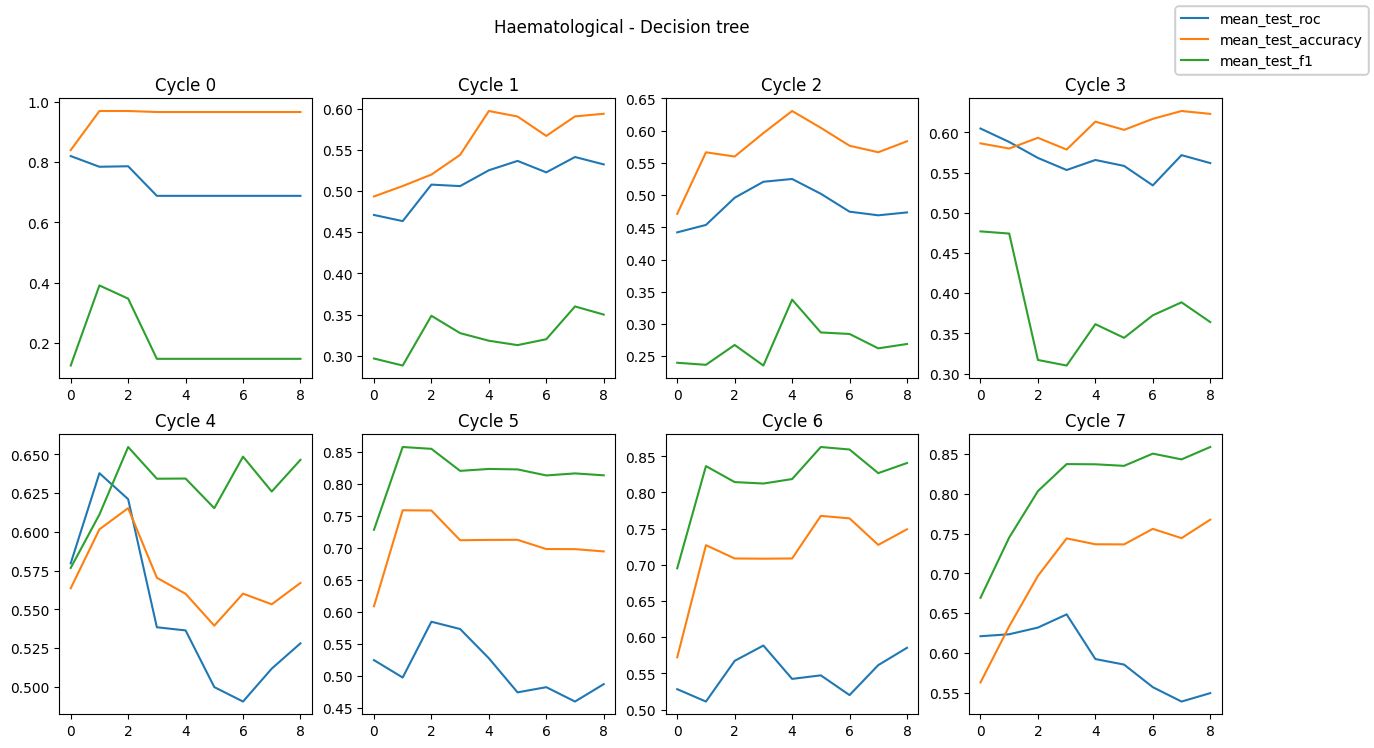

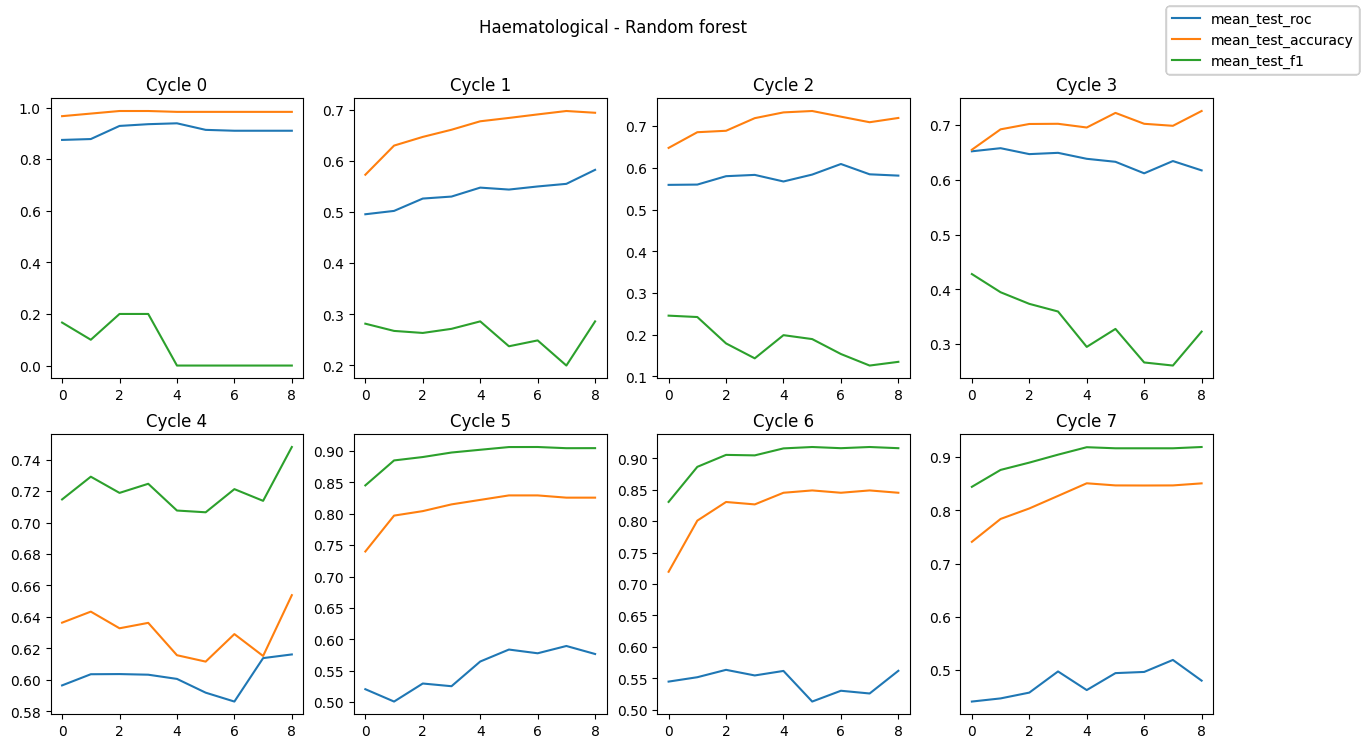

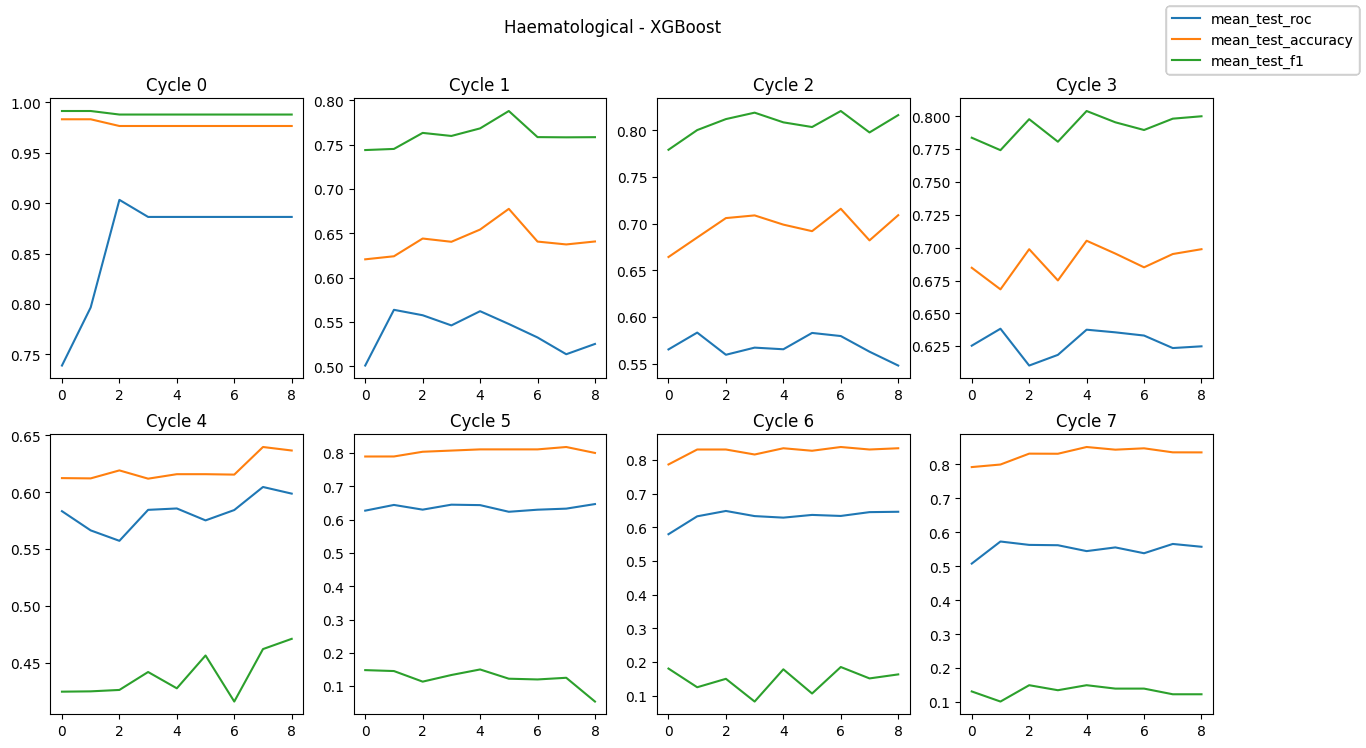

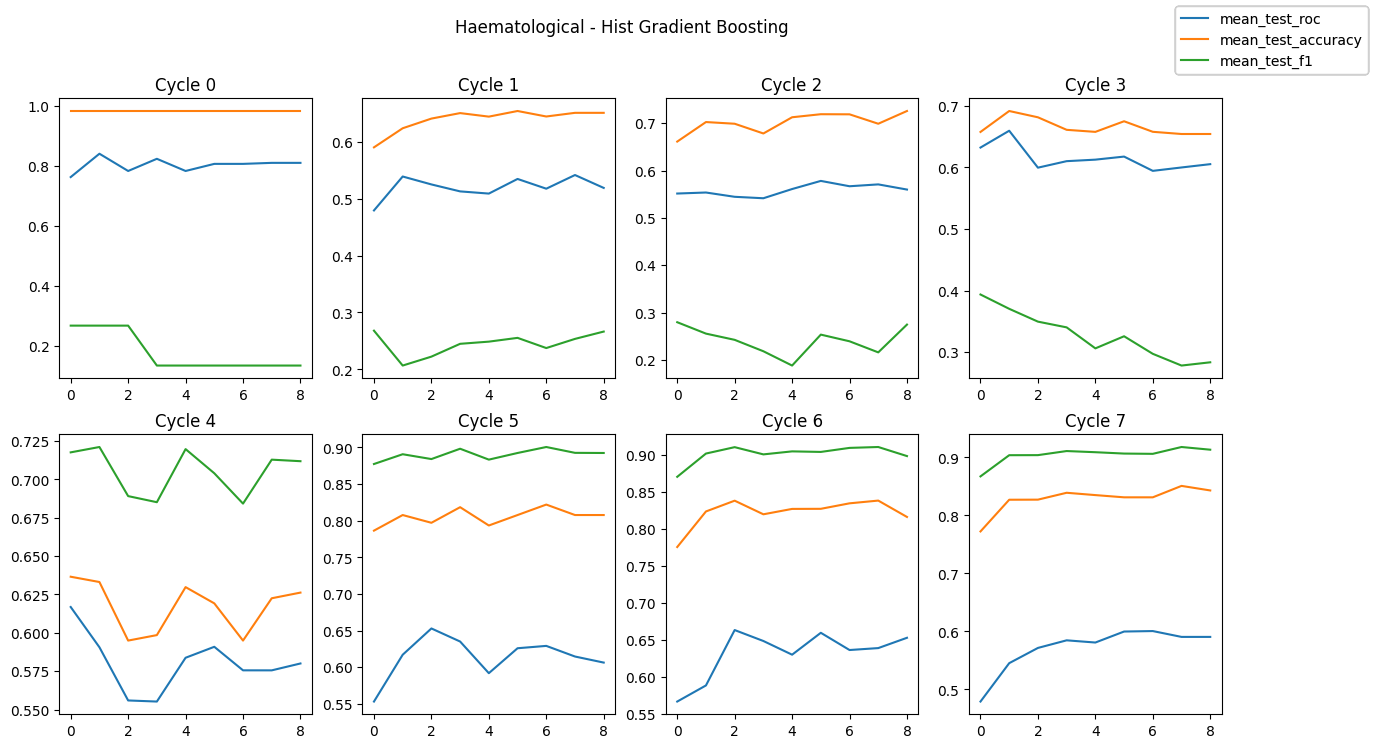

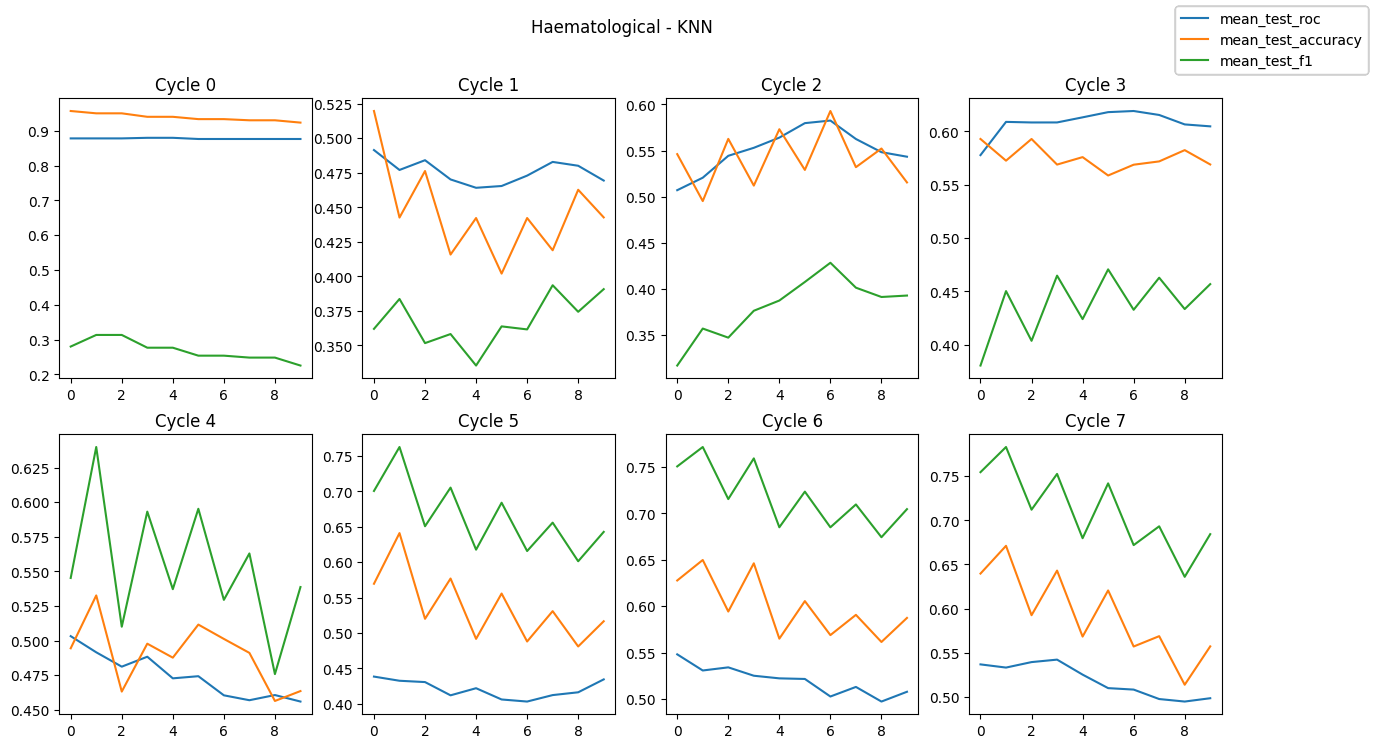

In [ ]:
# Splitting the plot into 4 figures
fig1, axs1 = plt.subplots(2, 4, figsize=(15, 8))
fig2, axs2 = plt.subplots(2, 4, figsize=(15, 8))
fig3, axs3 = plt.subplots(2, 4, figsize=(15, 8))
fig4, axs4 = plt.subplots(2, 4, figsize=(15, 8))
fig5, axs5 = plt.subplots(2, 4, figsize=(15, 8))


int_to_model = {0:'Decision tree', 1:'Random forest', 2:'XGBoost', 3:'Hist Gradient Boosting', 4:'KNN'}

figures = [(fig1, axs1), (fig2, axs2), (fig3, axs3), (fig4, axs4), (fig5, axs5)]

for model in range(len(test_results)):
    for cycle in range(len(test_results[model])):
        i = model
        j = cycle

        test_roc = test_results[model][cycle]['mean_test_roc_auc']
        test_acc = test_results[model][cycle]['mean_test_accuracy']
        test_f1 = test_results[model][cycle]['mean_test_f1']


        i = (model * 2 + cycle // 4) % 2
        j = (cycle % 4)
        # Plot on the corresponding subplot of one of the figures
        figures[model][1][i, j].plot(test_roc, label='mean_test_roc')
        figures[model][1][i, j].plot(test_acc, label='mean_test_accuracy')
        figures[model][1][i, j].plot(test_f1, label='mean_test_f1')

        figures[model][1][i, j].set_title(f'Cycle {cycle}')
        handles, labels = figures[model][1][i, j].get_legend_handles_labels()
        figures[model][0].legend(handles, labels, loc='upper right')
        figures[model][0].suptitle(f"Haematological - {int_to_model[model]}")

# Show the plots
plt.show()

<h2>Train test split</h2>

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

#X_all array of dataframes, every cell is the dataframe of the patients at cycle i
#targets_all array of dataframes, every cell is the dataframe of every toxicity per patient at cycle i

#Initialization
X_train_all = []
y_train_all = []
X_test_all = []
y_test_all = []

#X_all :: Array of dataframes, each dataframe represents baseline data at treatment cycle i
#targets_all :: Array of dataframes, each dataframe represents toxicities data at treatment cycle i

for i in range(len(X_all)):

  X = X_all[i]

  for col in targets_all[i].columns:
    #use only haematological toxicities
    if col != "treatment_cycle_toxicity_haematological":
      continue

    y = targets_all[i][col]
    y = y.fillna(2) #fill NaN values with 2
    y = y.replace(3,2) #Replace 3 values with 2

    #check if y is stratifiable, if a class of y has only one occurence it is not
    stratify = 1
    for key in y.unique():
      if 1 == y.value_counts()[key]:
        stratify = 0
        break

    #split
    if stratify:
      X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=1,
        shuffle=True,
        stratify=y
      )
    else:
      X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=1,
        shuffle=True,
        #stratify=y
      )

    X_train_all.append(X_train)
    y_train_all.append(y_train)
    X_test_all.append(X_valid)
    y_test_all.append(y_valid)


In [ ]:
int_to_tox_map =  {0: "cardiac",1: "febrile_neutropenia",2: "gastrointestinal",3: "haematological",4: "hemorrhagic",5: "hepatic_and_or_pancreatic",6: "metabolic",
                   7: "neurological",8: "pulmonary",9: "renal",10: "vascular",11: "infective",12: "other"}
tox_to_int_map = {"cardiac": 0,"febrile_neutropenia": 1,"gastrointestinal": 2,"haematological": 3,"hemorrhagic": 4,"hepatic_and_or_pancreatic": 5,"metabolic": 6,
                  "neurological": 7,"pulmonary": 8,"renal": 9,"vascular": 10,"infective": 11,"other": 12}

<h2>Oversampling</h2>



([Done]) Cycle 0: haematological oversampling completed


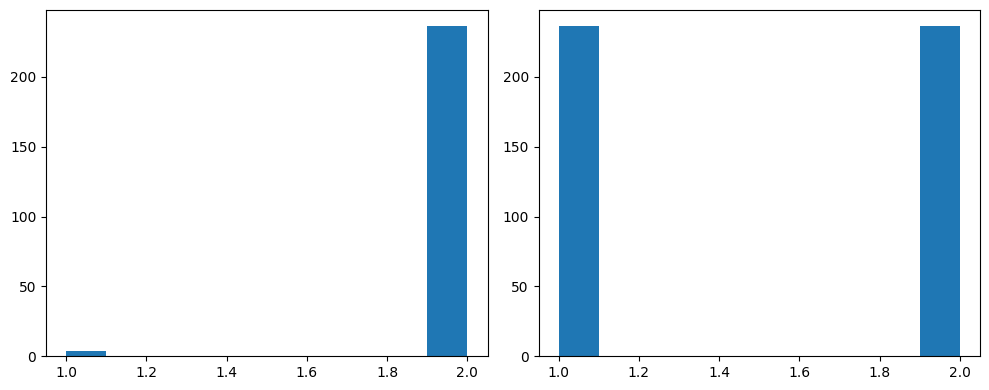

([Done]) Cycle 1: haematological oversampling completed


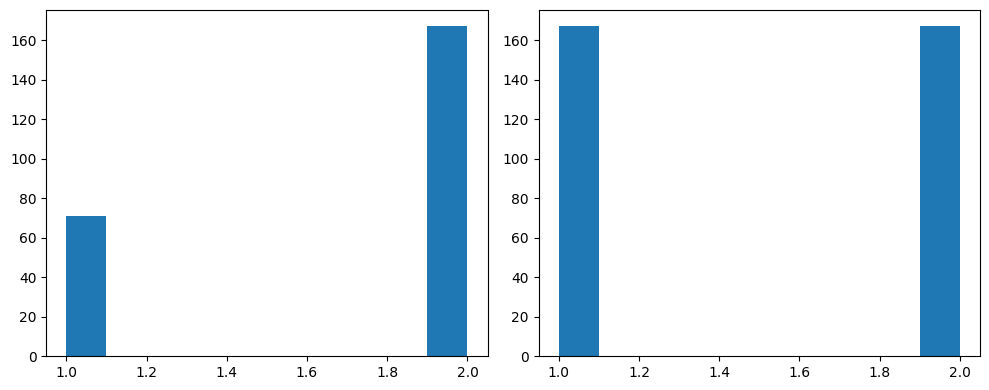

([Done]) Cycle 2: haematological oversampling completed


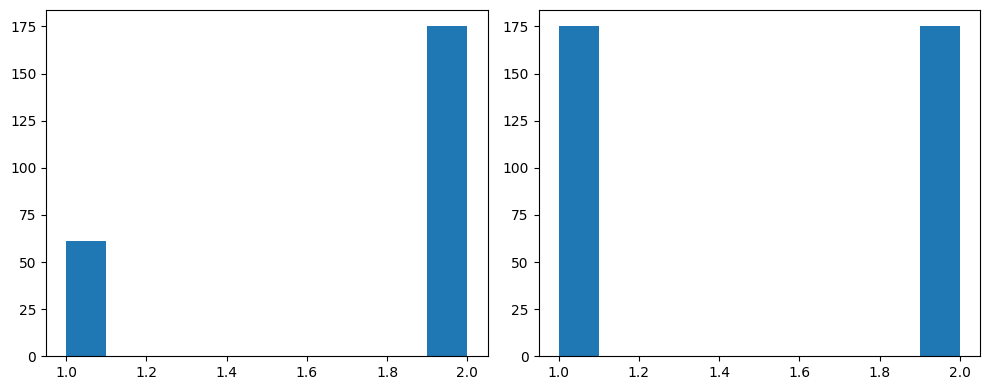

([Done]) Cycle 3: haematological oversampling completed


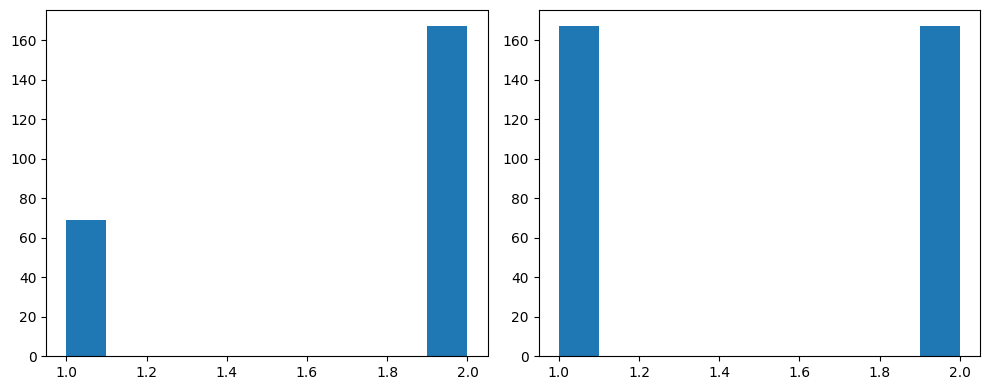

([Done]) Cycle 4: haematological oversampling completed


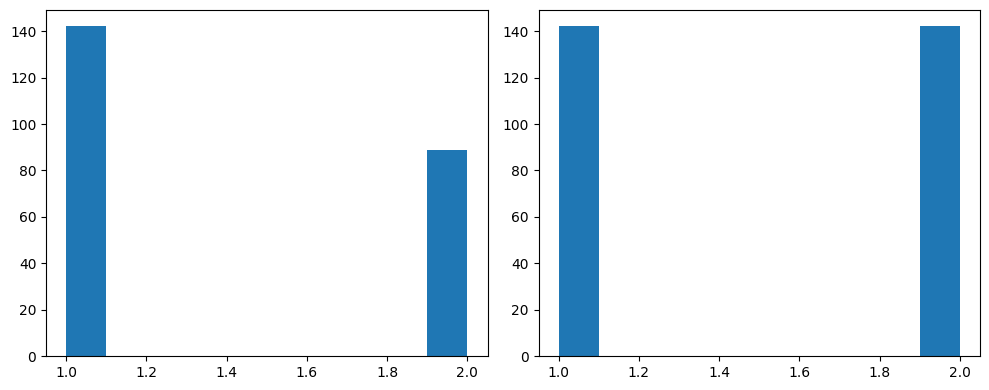

([Done]) Cycle 5: haematological oversampling completed


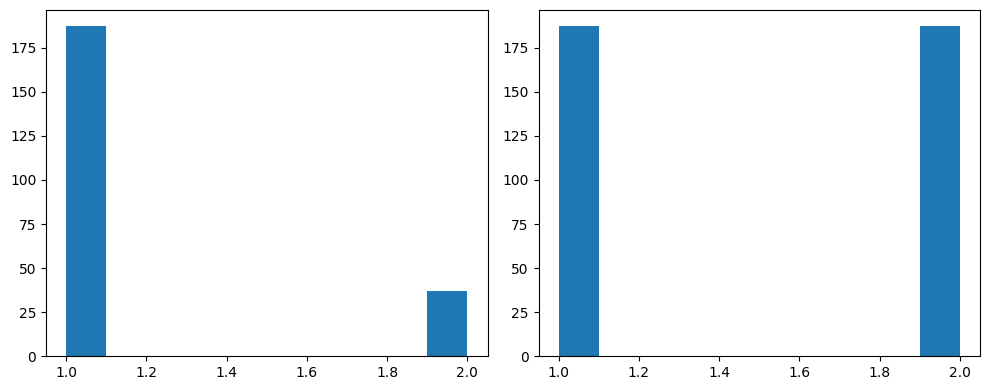

([Done]) Cycle 6: haematological oversampling completed


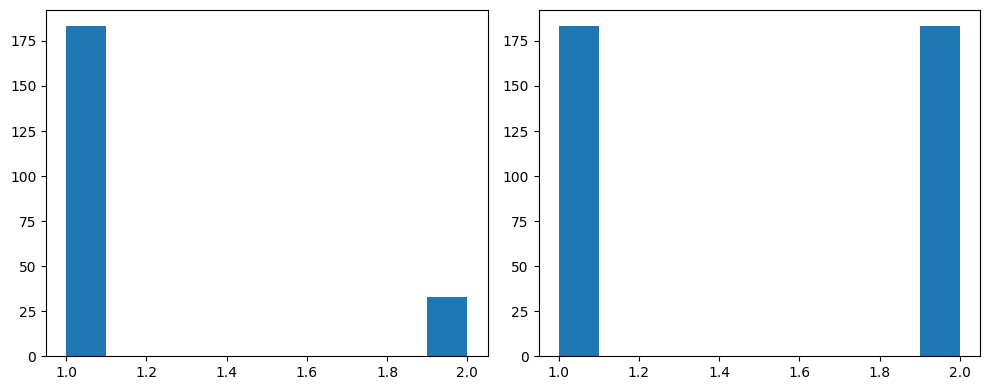

([Done]) Cycle 7: haematological oversampling completed


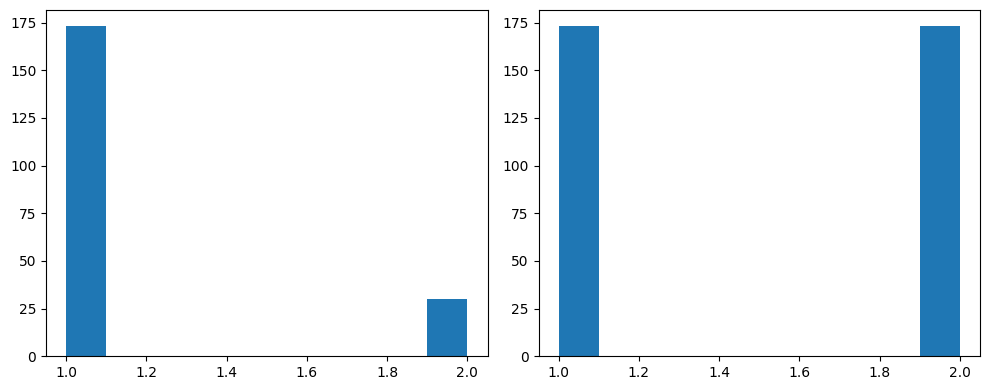

In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE

#X_train_all, y_train_all, X_test_all, y_test_all are matrices of dataframes
#Rows represent the cycles of the therapy
#Colums represent the types of toxicities
#For X_train_all and X_test_all each cell is a dataframe with the baseline of the patients
#For y_train_all and y_test_all each cell is an array with the values of the toxicity per patient

#Initialize oversampler
oversample = SMOTE(sampling_strategy="all", k_neighbors=3, random_state=1)

for i in range(len(X_train_all)):
  for j in range(len(X_train_all[i])):

    X_train = X_train_all[i] #baseline cycle i
    y_train = y_train_all[i] #targets cycle i

    #skip non haematological toxicities
    if j != tox_to_int_map["haematological"]:
      continue

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].hist(y_train)

    #Oversampling
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    print(f"([Done]) Cycle {i}: {int_to_tox_map[j]} oversampling completed")
    X_train_all[i] = X_train
    y_train_all[i] = y_train

    #Plot histograms of haematological toxicity after oversampling
    if j == tox_to_int_map["haematological"]:
      axs[1].hist(y_train)
      # Aggiusta il layout per una migliore visualizzazione
      plt.tight_layout()
      # Mostra il grafico
      plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB

results_dfs = []

models = {
          'Decision Tree': DecisionTreeClassifier(random_state=1),
          'Random Forest': RandomForestClassifier(random_state=1),
          'XGB': XGBClassifier(random_state=1),
          'HistGradientBoosting': HistGradientBoostingClassifier(random_state=1),
          'KNN': KNeighborsClassifier() ,
          'Naive Bayes': GaussianNB()
          }

for model_id,model_name in enumerate(models):
  print(f"{model_name}")
  df = pd.DataFrame(columns=["Our best accuray", "mipi accuracy", "ki accuracy",
                            "Our best ROC AUC", "mipi ROC AUC", "ki ROC AUC",
                            "Our best F1", "mipi F1", "ki F1"])
  for i in range(len(X_all)):

    if model_name != 'Naive Bayes':
      params = best_model_params[model_id][i]

    if model_id == 0:
      model = DecisionTreeClassifier(max_depth=params, random_state=1)
    elif model_id == 1:
      model = RandomForestClassifier(max_depth=params, random_state=1)
    elif model_id == 2:
      model = XGBClassifier(max_depth=params, random_state=1)
    elif model_id == 3:
      model = HistGradientBoostingClassifier(max_depth=params, random_state=1)
    elif model_id == 4:
      model = KNeighborsClassifier(n_neighbors=params)
    elif model_id == 5:
      model = GaussianNB()


    X = X_train_all[i]
    y = y_train_all[i].copy()
    X_test = X_test_all[i]
    y_test = y_test_all[i].copy()

    y-=1
    y_test-=1

    mipi = X_test.baseline_mipi
    ki = X_test.baseline_ki_67

    if model_name != 'Naive Bayes':
      model = best_models[model_id][i]
    model = model.fit(X,y)
    y_predicted = model.predict(X_test)

    # MIPI low- (score 0–3), intermediate- (score 4–5) or high-risk (score 6–11)
    mipi_predicted = mipi.fillna(-1).apply(lambda x: 0 if x > 7 else 1) # 6 e 7 sono le soglie migliori
    ki_predicted = ki.fillna(-1).apply(lambda x: 0 if x >= 20 else 1)


    results = []
    results.append(accuracy_score(y_test, y_predicted, normalize=True))
    results.append(accuracy_score(y_test, mipi_predicted, normalize=True))
    results.append(accuracy_score(y_test, ki_predicted, normalize=True))

    results.append(roc_auc_score(y_test, y_predicted))
    results.append(roc_auc_score(y_test, mipi_predicted))
    results.append(roc_auc_score(y_test, ki_predicted))

    results.append(f1_score(y_test, y_predicted))
    results.append(f1_score(y_test, mipi_predicted))
    results.append(f1_score(y_test, ki_predicted))
    results = pd.Series(results, index=df.columns)

    df = pd.concat([df, results.to_frame().T], ignore_index=True)


  df.index = ["Cycle "+str(i) for i in range(8)]
  results_dfs.append(df)
  print("--DONE--")

Decision Tree
--DONE--
Random Forest
--DONE--
XGB
--DONE--
HistGradientBoosting
--DONE--
KNN
--DONE--
Naive Bayes
--DONE--


In [ ]:
results_dfs[0]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.983333,0.950000,0.483333,0.500000,0.483051,0.245763,0.991597,0.974359,0.651685
Cycle 1,0.516667,0.750000,0.316667,0.448413,0.583333,0.384921,0.641975,0.848485,0.305085
Cycle 2,0.474576,0.694915,0.423729,0.362121,0.465909,0.459848,0.626506,0.820000,0.500000
Cycle 3,0.610169,0.711864,0.389831,0.568627,0.517507,0.448880,0.708861,0.828283,0.419355
Cycle 4,0.655172,0.396552,0.500000,0.642677,0.505051,0.473485,0.565217,0.545455,0.355556
Cycle 5,0.824561,0.192982,0.578947,0.500000,0.510638,0.547872,0.000000,0.303030,0.294118
Cycle 6,0.763636,0.145455,0.509091,0.550532,0.448138,0.401596,0.235294,0.229508,0.129032
Cycle 7,0.725490,0.156863,0.588235,0.600649,0.511364,0.461039,0.300000,0.245614,0.160000


In [ ]:
results_dfs[1]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.983333,0.950000,0.483333,0.500000,0.483051,0.245763,0.991597,0.974359,0.651685
Cycle 1,0.716667,0.750000,0.316667,0.607143,0.583333,0.384921,0.813187,0.848485,0.305085
Cycle 2,0.745763,0.694915,0.423729,0.543939,0.465909,0.459848,0.848485,0.820000,0.500000
Cycle 3,0.711864,0.711864,0.389831,0.552521,0.517507,0.448880,0.821053,0.828283,0.419355
Cycle 4,0.672414,0.396552,0.500000,0.621212,0.505051,0.473485,0.486486,0.545455,0.355556
Cycle 5,0.842105,0.192982,0.578947,0.550000,0.510638,0.547872,0.181818,0.303030,0.294118
Cycle 6,0.800000,0.145455,0.509091,0.468085,0.448138,0.401596,0.000000,0.229508,0.129032
Cycle 7,0.843137,0.156863,0.588235,0.548701,0.511364,0.461039,0.200000,0.245614,0.160000


In [ ]:
results_dfs[2]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.983333,0.950000,0.483333,0.500000,0.483051,0.245763,0.991597,0.974359,0.651685
Cycle 1,0.666667,0.750000,0.316667,0.555556,0.583333,0.384921,0.777778,0.848485,0.305085
Cycle 2,0.593220,0.694915,0.423729,0.441667,0.465909,0.459848,0.733333,0.820000,0.500000
Cycle 3,0.508475,0.711864,0.389831,0.374650,0.517507,0.448880,0.666667,0.828283,0.419355
Cycle 4,0.637931,0.396552,0.500000,0.602273,0.505051,0.473485,0.487805,0.545455,0.355556
Cycle 5,0.789474,0.192982,0.578947,0.518085,0.510638,0.547872,0.142857,0.303030,0.294118
Cycle 6,0.818182,0.145455,0.509091,0.582447,0.448138,0.401596,0.285714,0.229508,0.129032
Cycle 7,0.862745,0.156863,0.588235,0.620130,0.511364,0.461039,0.363636,0.245614,0.160000


In [ ]:
results_dfs[3]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.983333,0.950000,0.483333,0.500000,0.483051,0.245763,0.991597,0.974359,0.651685
Cycle 1,0.700000,0.750000,0.316667,0.579365,0.583333,0.384921,0.804348,0.848485,0.305085
Cycle 2,0.576271,0.694915,0.423729,0.408333,0.465909,0.459848,0.725275,0.820000,0.500000
Cycle 3,0.593220,0.711864,0.389831,0.451681,0.517507,0.448880,0.733333,0.828283,0.419355
Cycle 4,0.655172,0.396552,0.500000,0.642677,0.505051,0.473485,0.565217,0.545455,0.355556
Cycle 5,0.771930,0.192982,0.578947,0.507447,0.510638,0.547872,0.133333,0.303030,0.294118
Cycle 6,0.800000,0.145455,0.509091,0.468085,0.448138,0.401596,0.000000,0.229508,0.129032
Cycle 7,0.823529,0.156863,0.588235,0.537338,0.511364,0.461039,0.181818,0.245614,0.160000


In [ ]:
results_dfs[4]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.950000,0.950000,0.483333,0.483051,0.483051,0.245763,0.974359,0.974359,0.651685
Cycle 1,0.466667,0.750000,0.316667,0.396825,0.583333,0.384921,0.600000,0.848485,0.305085
Cycle 2,0.610169,0.694915,0.423729,0.562879,0.465909,0.459848,0.716049,0.820000,0.500000
Cycle 3,0.711864,0.711864,0.389831,0.692577,0.517507,0.448880,0.784810,0.828283,0.419355
Cycle 4,0.551724,0.396552,0.500000,0.515152,0.505051,0.473485,0.380952,0.545455,0.355556
Cycle 5,0.596491,0.192982,0.578947,0.401064,0.510638,0.547872,0.080000,0.303030,0.294118
Cycle 6,0.563636,0.145455,0.509091,0.381649,0.448138,0.401596,0.076923,0.229508,0.129032
Cycle 7,0.627451,0.156863,0.588235,0.423701,0.511364,0.461039,0.095238,0.245614,0.160000


In [ ]:
results_dfs[5]

,Our best accuray,mipi accuracy,ki accuracy,Our best ROC AUC,mipi ROC AUC,ki ROC AUC,Our best F1,mipi F1,ki F1
Cycle 0,0.983333,0.950000,0.483333,0.500000,0.483051,0.245763,0.991597,0.974359,0.651685
Cycle 1,0.616667,0.750000,0.316667,0.599206,0.583333,0.384921,0.701299,0.848485,0.305085
Cycle 2,0.338983,0.694915,0.423729,0.446970,0.465909,0.459848,0.338983,0.820000,0.500000
Cycle 3,0.525424,0.711864,0.389831,0.526611,0.517507,0.448880,0.611111,0.828283,0.419355
Cycle 4,0.413793,0.396552,0.500000,0.430556,0.505051,0.473485,0.392857,0.545455,0.355556
Cycle 5,0.456140,0.192982,0.578947,0.473404,0.510638,0.547872,0.243902,0.303030,0.294118
Cycle 6,0.563636,0.145455,0.509091,0.381649,0.448138,0.401596,0.076923,0.229508,0.129032
Cycle 7,0.823529,0.156863,0.588235,0.537338,0.511364,0.461039,0.181818,0.245614,0.160000


<h1>Prediction of haematological toxicities: wbc, platelets, hb, granulocytes </h1>

In [ ]:
split_column_index = df.columns.get_loc("treatment_cycle_toxicity_haematological")
df_haematological = df.iloc[:,:split_column_index]
df_haematological = pd.concat([df_haematological,df.iloc[:,split_column_index:split_column_index+5]], axis=1)
df_haematological["treatment_cycle_toxicity_haematological"].fillna(2)
df_haematological["treatment_cycle_toxicity_haematological"].replace(3,2)
df_haematological

,iil_mcl0208_paziente_id,criteri_inclusion_criteria_8,criteri_inclusion_criteria_9,criteri_inclusion_criteria_10,criteri_exclusion_criteria_1,criteri_exclusion_criteria_2,criteri_exclusion_criteria_3,criteri_exclusion_criteria_4,criteri_exclusion_criteria_5,criteri_exclusion_criteria_6,...,baseline_renal_hilus_sx,baseline_spleen,baseline_splenic_hepatic_hilus,baseline_ki_67,iil_mcl0208_paziente_sex,treatment_cycle_toxicity_haematological,treatment_cycle_toxicity_haematological_wbc,treatment_cycle_toxicity_haematological_platelets,treatment_cycle_toxicity_haematological_hb,treatment_cycle_toxicity_haematological_granulocytes
0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,10.0,1.0,2.0,NaN,NaN,NaN,NaN
1,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,10.0,1.0,2.0,NaN,NaN,NaN,NaN
2,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,10.0,1.0,1.0,0.0,0.0,2.0,0.0
3,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,308.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,50.0,1.0,1.0,2.0,1.0,NaN,1.0
2279,308.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,50.0,1.0,1.0,2.0,3.0,1.0,NaN
2280,308.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,50.0,1.0,1.0,4.0,4.0,2.0,4.0
2281,308.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,50.0,1.0,1.0,3.0,4.0,2.0,3.0


In [ ]:
df_haematological["treatment_cycle_toxicity_haematological_wbc"].value_counts()

4.0    695
3.0    123
0.0     94
2.0     69
1.0     65
5.0      1
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64

In [ ]:
df_haematological["treatment_cycle_toxicity_haematological_platelets"].value_counts()

4.0    576
0.0    182
1.0    113
3.0    112
2.0     64
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64

In [ ]:
df_haematological["treatment_cycle_toxicity_haematological_hb"].value_counts()

2.0    415
1.0    271
3.0    188
0.0    145
4.0     33
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64

In [ ]:
df_haematological["treatment_cycle_toxicity_haematological_granulocytes"].value_counts()

4.0    735
3.0    110
0.0     93
2.0     61
1.0     50
5.0      1
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64

In [ ]:
#Get the number of dataframes to create
max_cycles_per_patient = max(df_haematological['iil_mcl0208_paziente_id'].value_counts())

#Initialization
X_all = []
targets_all = []
for _ in range(max_cycles_per_patient):
  X_all.append(pd.DataFrame())
  targets_all.append(pd.DataFrame())

prev = None
n = 0

#Create X dataframes divided by cycle
for _, row in df_haematological.iterrows():

  #Reset n if the current id is different from the last one
  if row["iil_mcl0208_paziente_id"] != prev:
    n=0

  #Add the row to the corresponding dataframe
  new_row = pd.DataFrame([row])
  X_all[n] = pd.concat([X_all[n], new_row], ignore_index=True)

  #Update values
  n+=1
  prev = row["iil_mcl0208_paziente_id"]


#Create traget dataframes divided by cycle
for i in range(len(X_all)):
  targets_all[i] = X_all[i][["treatment_cycle_toxicity_haematological_wbc",
                              "treatment_cycle_toxicity_haematological_platelets",
                              "treatment_cycle_toxicity_haematological_hb",
                              "treatment_cycle_toxicity_haematological_granulocytes"
                              ]]
  #Split dataframe in baseline and treatment
  split_column = "treatment_cycle_toxicity_haematological"
  split_column_index = df.columns.get_loc(split_column)
  X_all[i] = X_all[i].iloc[:,:split_column_index]

<h2>Train test split</h2>

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

#X_all array of dataframes, every cell is the dataframe of the patients at cycle i
#targets_all array of dataframes, every cell is the dataframe of every toxicity per patient at cycle i

#Initialization
X_train_all = []
y_train_all = []
X_test_all = []
y_test_all = []
for _ in range(max_cycles_per_patient):
  X_train_all.append([])
  y_train_all.append([])
  X_test_all.append([])
  y_test_all.append([])

#X_all :: Array of dataframes, each dataframe represents baseline data at treatment cycle i
#targets_all :: Array of dataframes, each dataframe represents toxicities data at treatment cycle i

for i in range(len(X_all)):

  X = X_all[i]

  for col in targets_all[i].columns:

    y = targets_all[i][col]
    y = y.fillna(0) #fill NaN values with 0

    #Replace values that occur only once with the value that has the maximum occurrence
    y_vals = y.value_counts()
    for val in y_vals[y_vals <= 1].index:
      y = y.replace(val, y_vals.idxmax())

    #split
    X_train, X_valid, y_train, y_valid = train_test_split(
      X,
      y,
      test_size=0.2,
      random_state=1,
      shuffle=True,
      stratify=y
    )

    X_train_all[i].append(X_train)
    y_train_all[i].append(y_train)
    X_test_all[i].append(X_valid)
    y_test_all[i].append(y_valid)



In [ ]:
int_to_tox_map = {0:'wbc',1:'platelets',2:'hb',3:'granulocytes'}
tox_to_int_map = {'wbc':0,'platelets':1,'hb':2,'granulocytes':3}

<h2>Over sampling</h2>

Cycle 0: wbc has just one class, does not need to oversample 


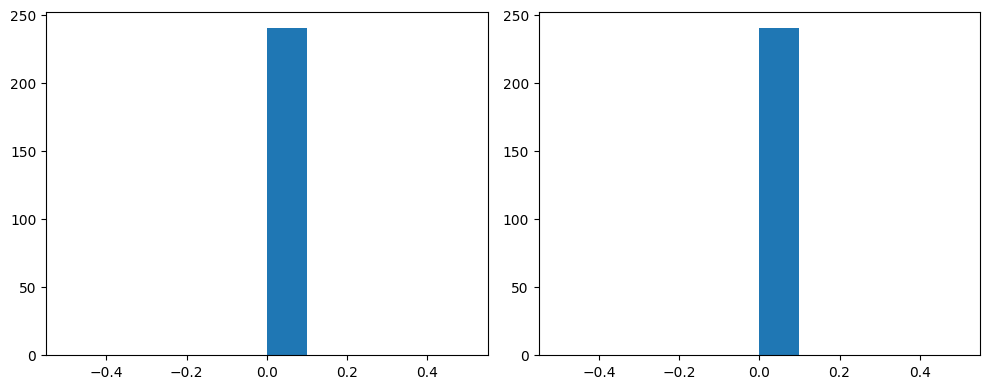

Cycle 0: platelets has just one class, does not need to oversample 


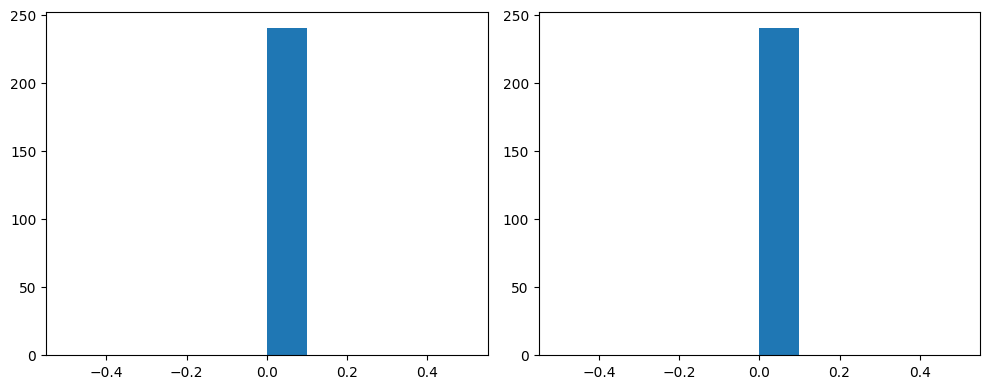

0.0    238
1.0      2
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
1
Cycle 0: hb oversampling completed


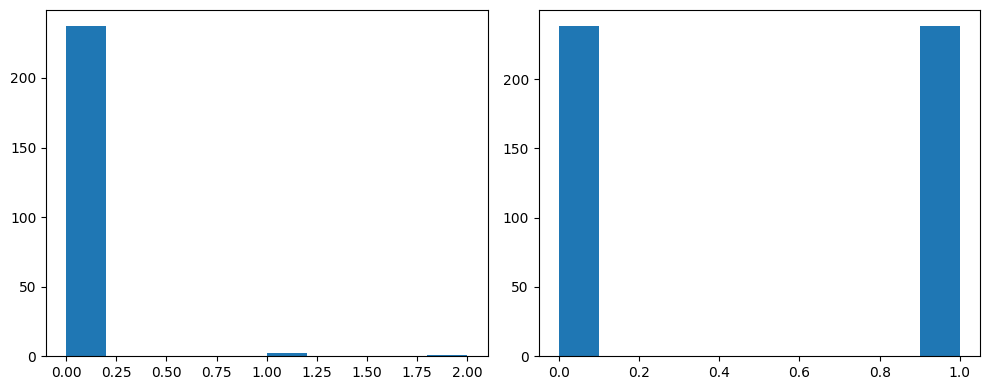

0.0    238
4.0      2
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
1
Cycle 0: granulocytes oversampling completed


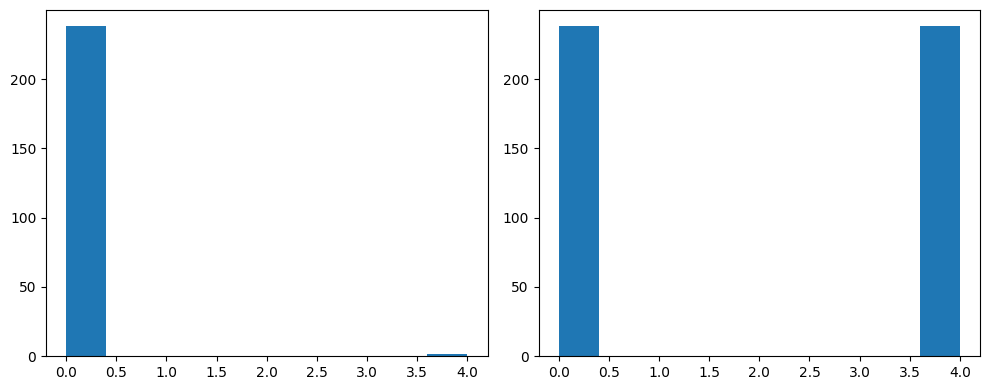

0.0    188
3.0     17
1.0     16
2.0     13
4.0      4
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
3
Cycle 1: wbc oversampling completed


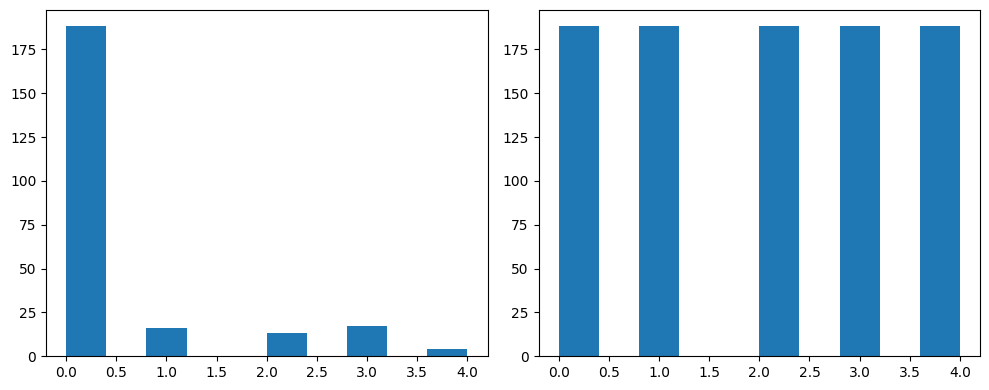

0.0    212
1.0     17
3.0      4
2.0      3
4.0      2
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
1
Cycle 1: platelets oversampling completed


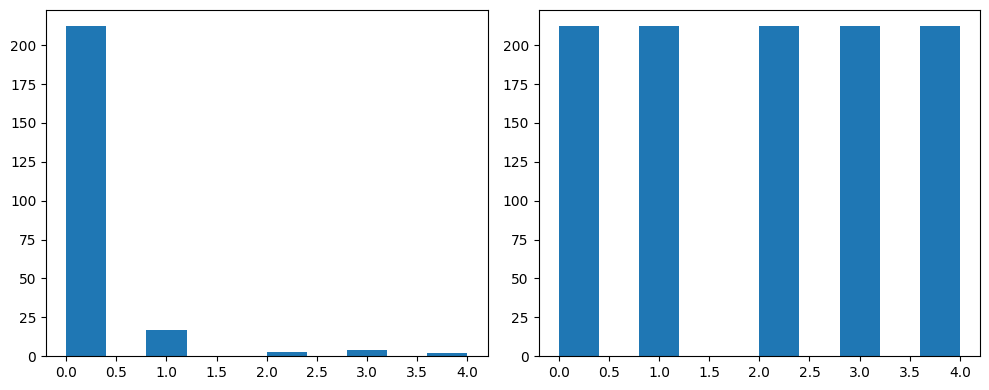

0.0    205
1.0     23
2.0      8
3.0      2
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
1
Cycle 1: hb oversampling completed


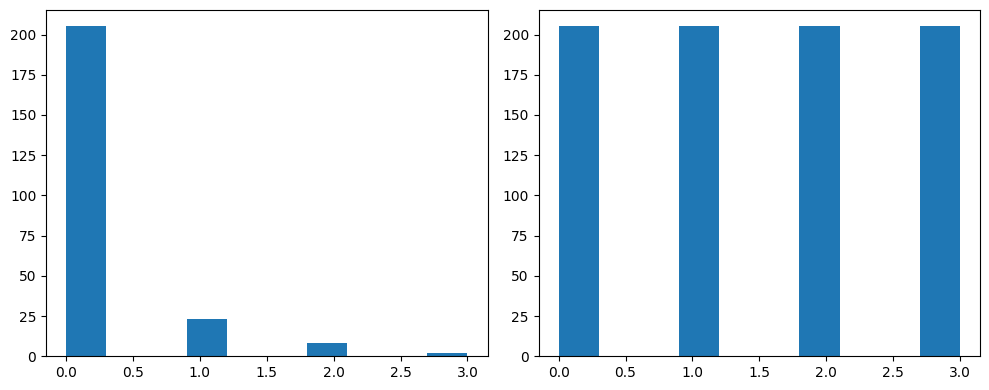

0.0    183
3.0     18
1.0     13
4.0     12
2.0     12
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
5
Cycle 1: granulocytes oversampling completed


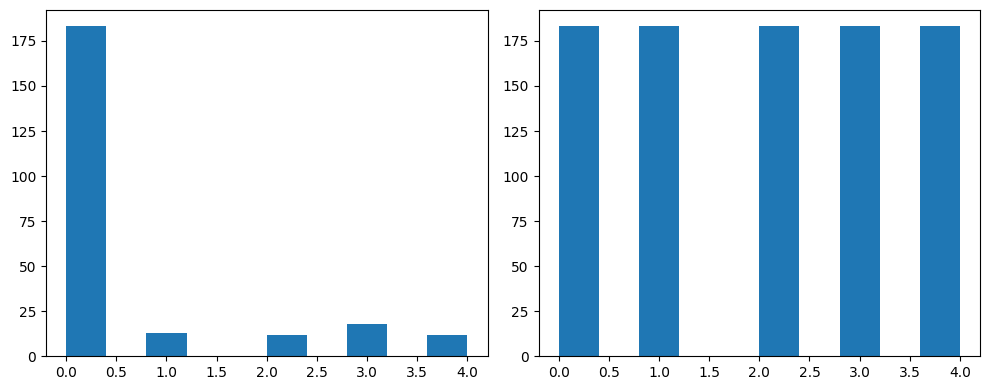

0.0    195
3.0     13
1.0     13
2.0      9
4.0      6
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
5
Cycle 2: wbc oversampling completed


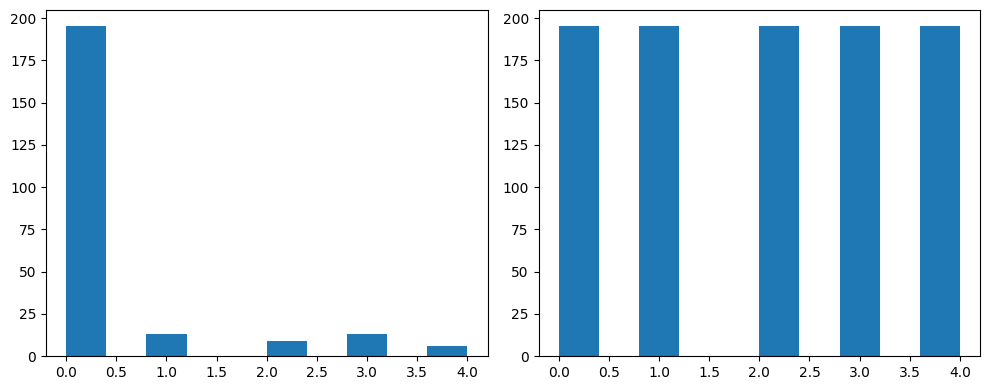

0.0    225
1.0      7
2.0      2
3.0      2
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
1
Cycle 2: platelets oversampling completed


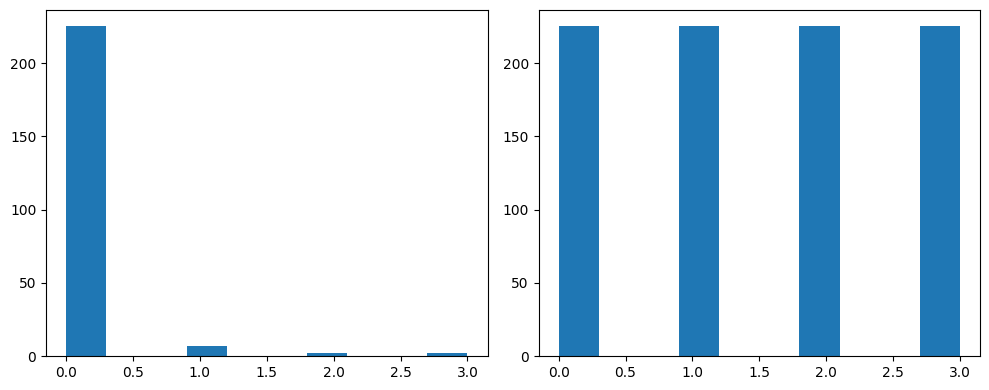

0.0    203
1.0     28
2.0      5
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
3
Cycle 2: hb oversampling completed


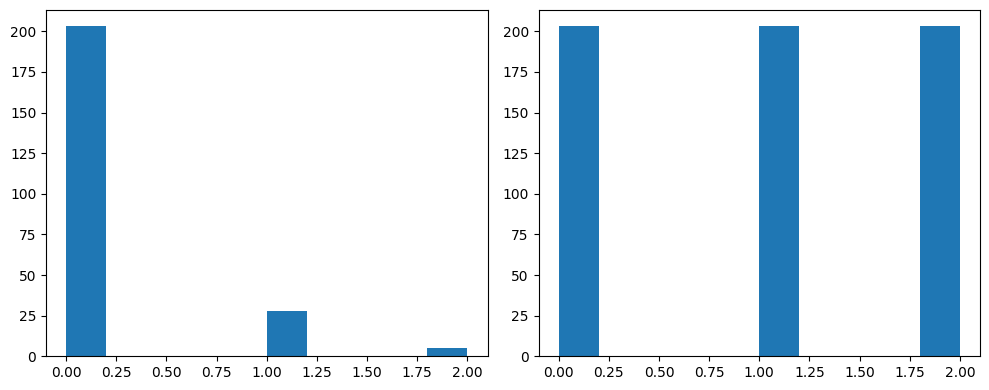

0.0    193
3.0     13
4.0     12
2.0      9
1.0      9
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
5
Cycle 2: granulocytes oversampling completed


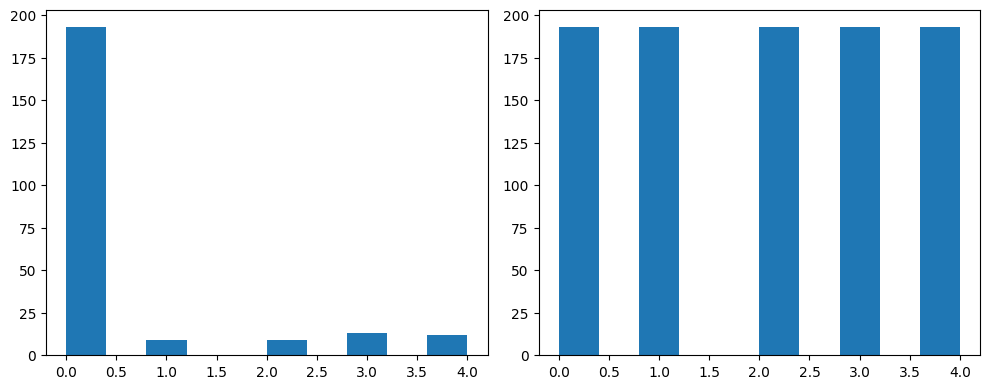

0.0    194
2.0     15
3.0     14
1.0     10
4.0      3
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
1
Cycle 3: wbc oversampling completed


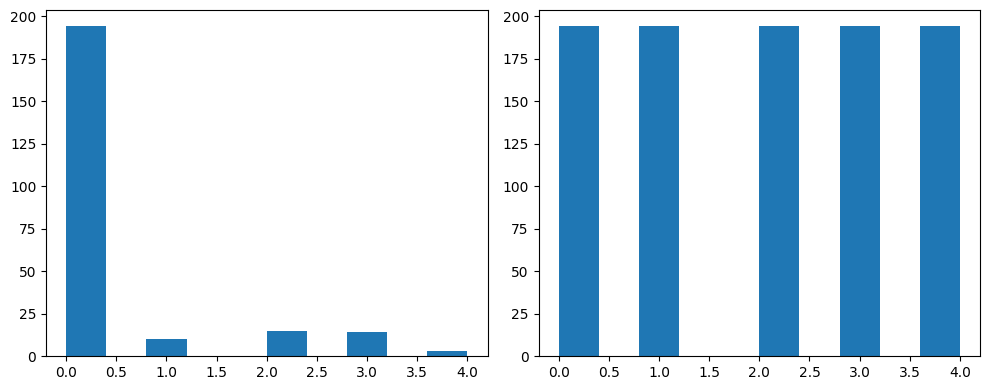

0.0    220
1.0     14
3.0      2
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
1
Cycle 3: platelets oversampling completed


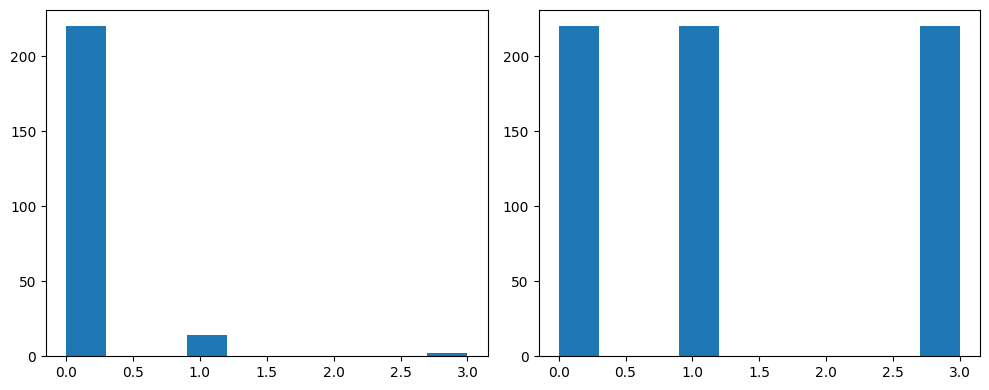

0.0    194
1.0     38
2.0      4
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
3
Cycle 3: hb oversampling completed


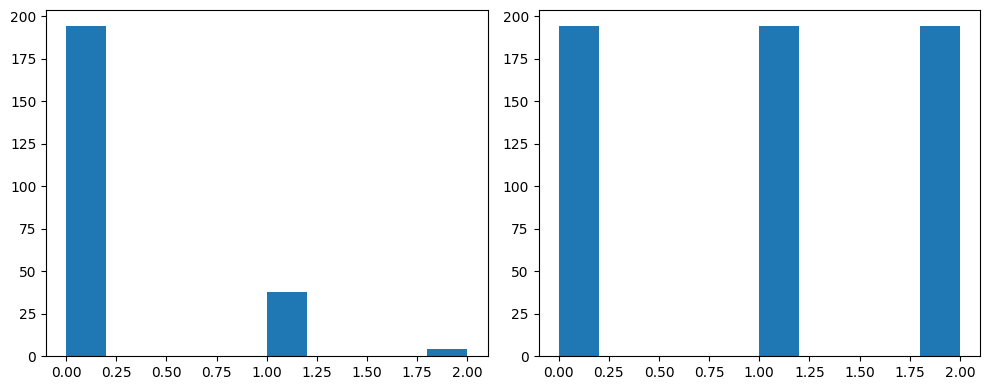

0.0    191
3.0     17
4.0     10
2.0     10
1.0      8
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
5
Cycle 3: granulocytes oversampling completed


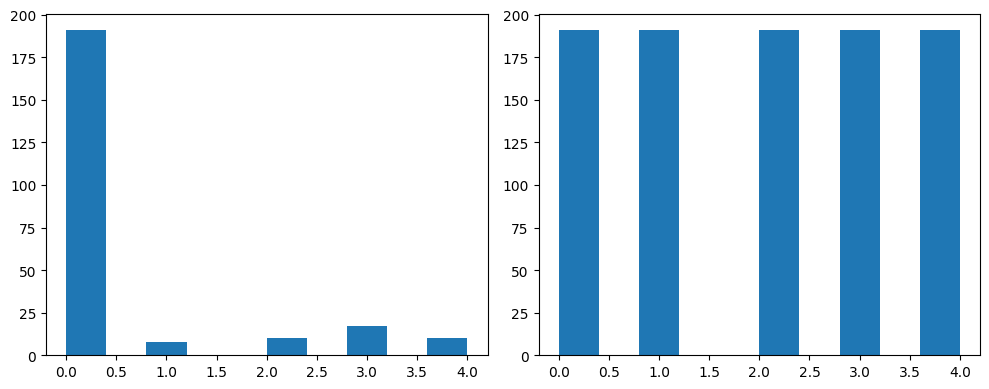

0.0    104
4.0    101
3.0     16
2.0      6
1.0      4
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
3
Cycle 4: wbc oversampling completed


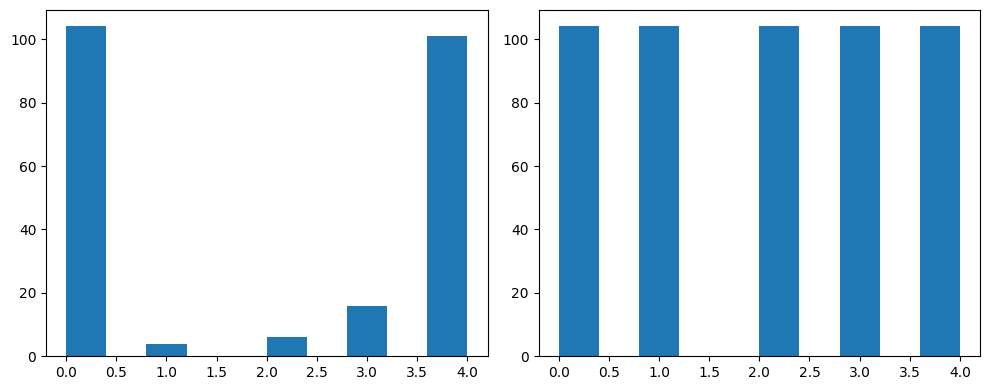

0.0    122
1.0     38
3.0     27
2.0     27
4.0     17
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
5
Cycle 4: platelets oversampling completed


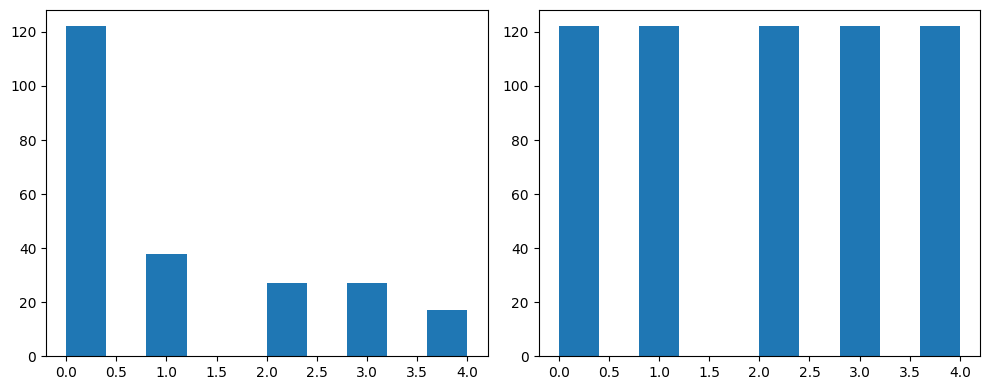

0.0    119
1.0     54
2.0     43
3.0     15
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
5
Cycle 4: hb oversampling completed


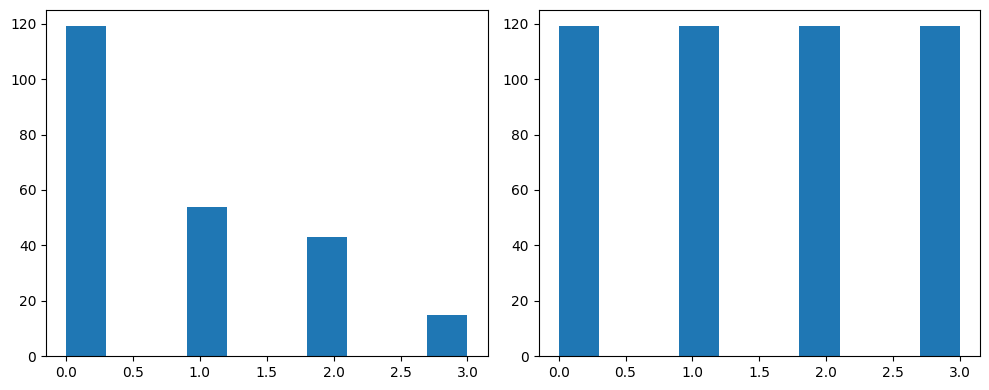

4.0    112
0.0     99
3.0     10
2.0      6
1.0      4
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
3
Cycle 4: granulocytes oversampling completed


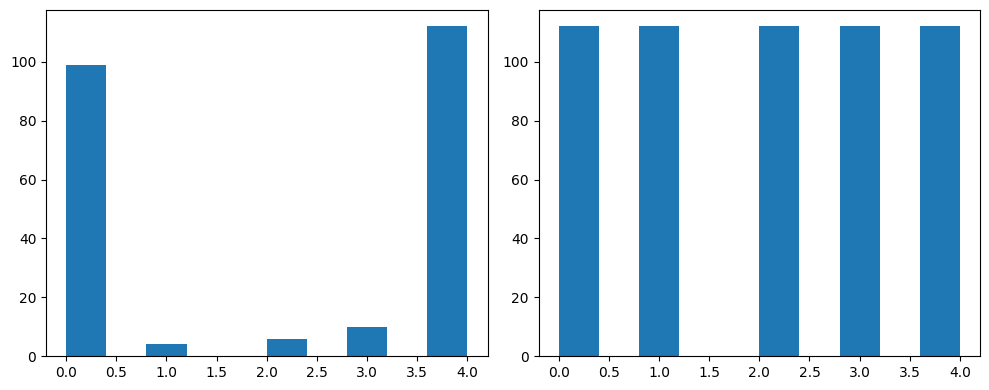

4.0    151
0.0     54
3.0     12
1.0      5
2.0      2
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
1
Cycle 5: wbc oversampling completed


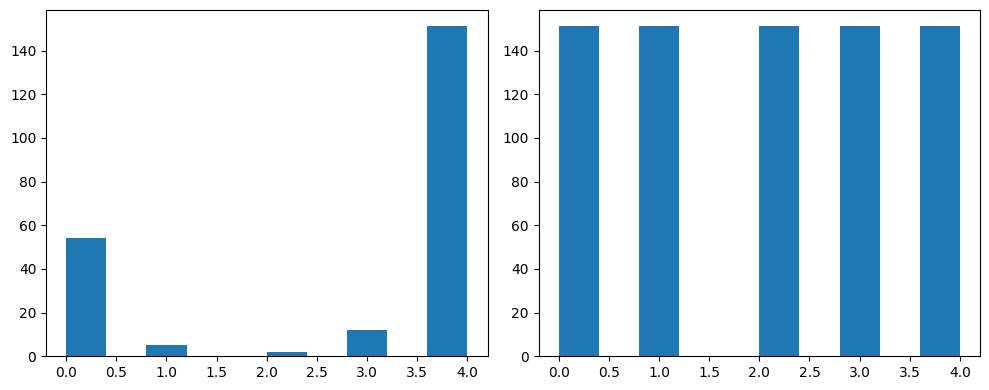

4.0    144
0.0     44
3.0     24
1.0      6
2.0      6
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
5
Cycle 5: platelets oversampling completed


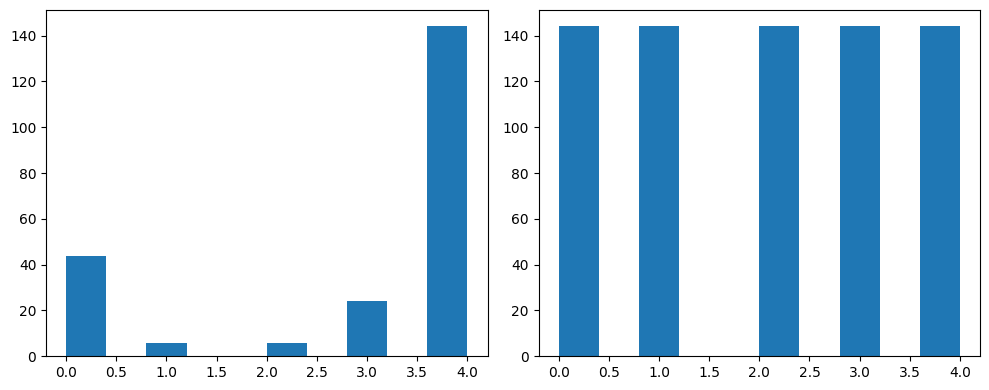

2.0    92
0.0    56
3.0    40
1.0    31
4.0     5
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
3
Cycle 5: hb oversampling completed


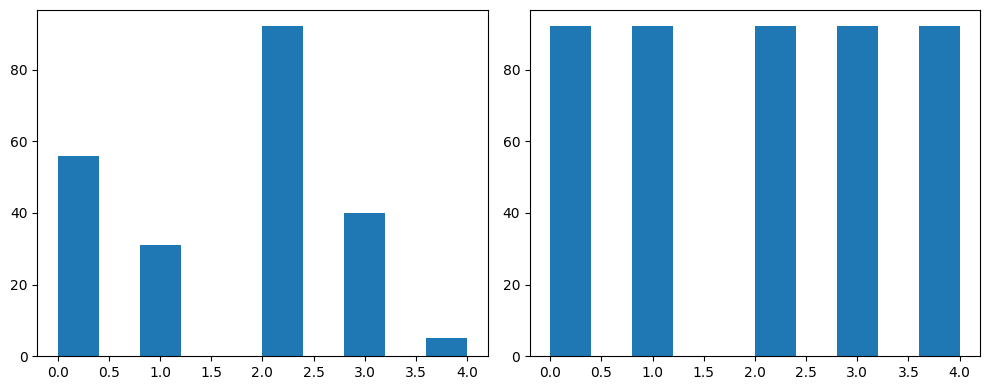

4.0    150
0.0     58
3.0     10
1.0      4
2.0      2
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
1
Cycle 5: granulocytes oversampling completed


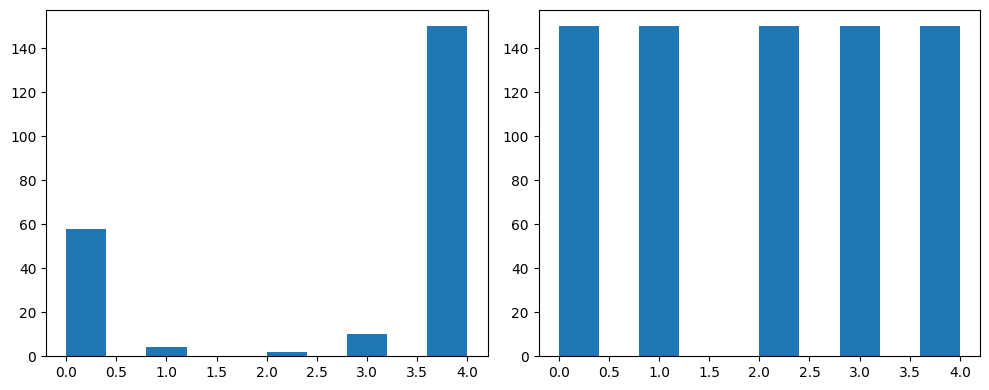

4.0    140
0.0     49
3.0     21
2.0      6
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
5
Cycle 6: wbc oversampling completed


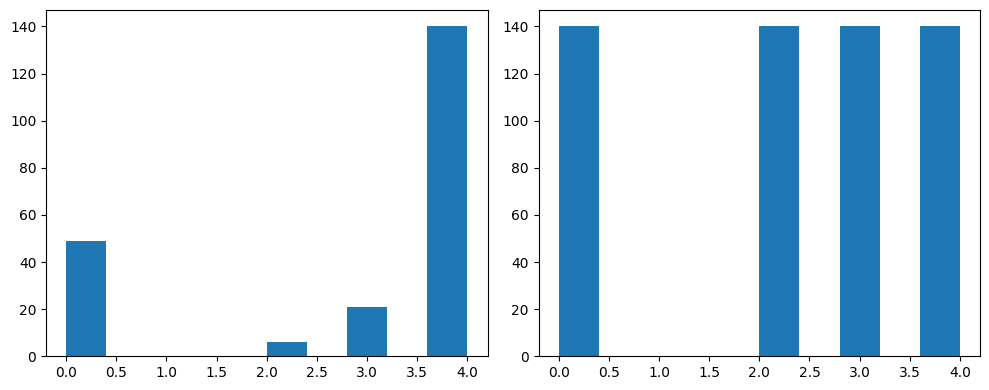

4.0    150
0.0     41
3.0     13
2.0      7
1.0      5
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
3
Cycle 6: platelets oversampling completed


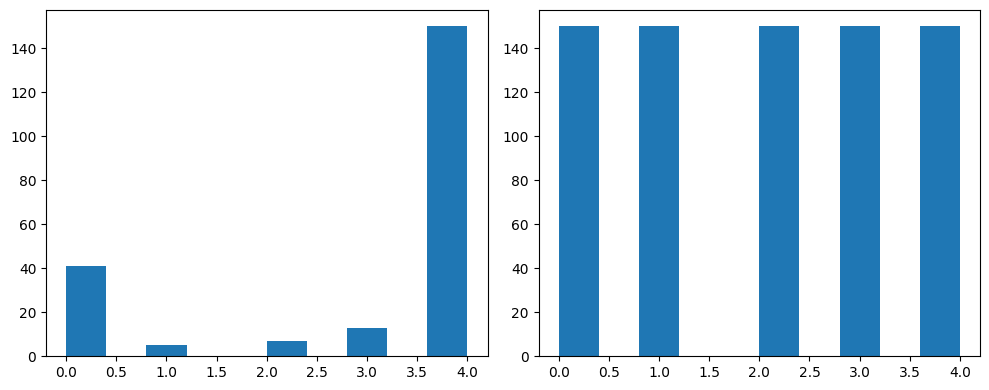

2.0    94
3.0    46
0.0    46
1.0    23
4.0     7
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
5
Cycle 6: hb oversampling completed


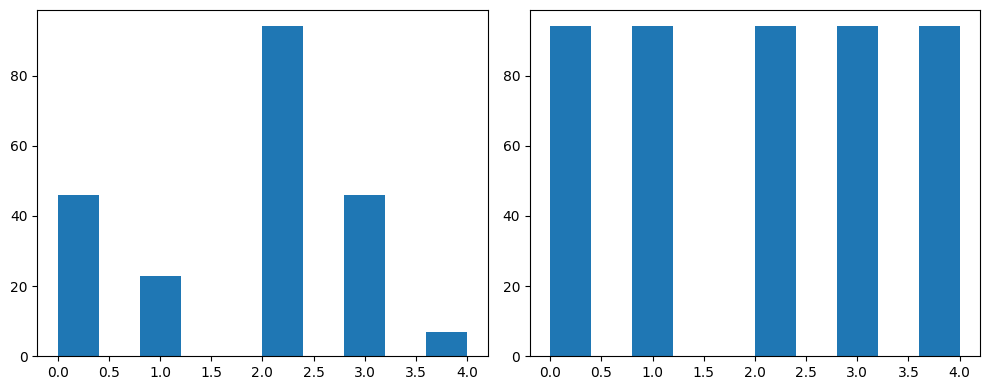

4.0    147
0.0     52
3.0     12
2.0      5
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
3
Cycle 6: granulocytes oversampling completed


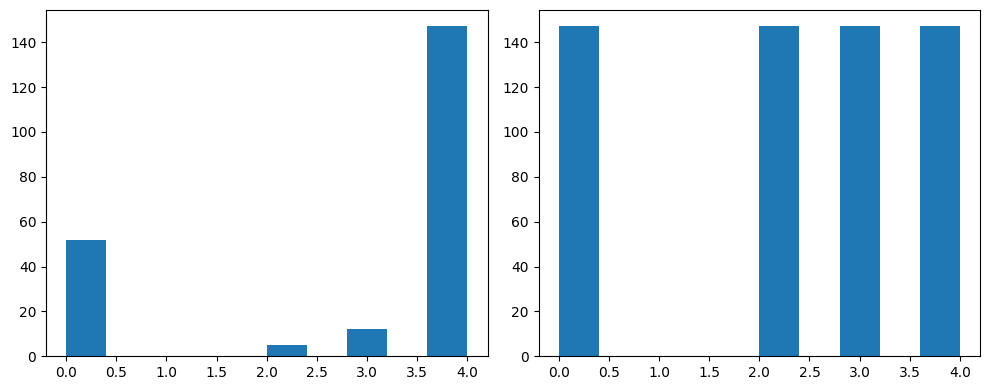

4.0    152
0.0     41
3.0      5
1.0      3
2.0      2
Name: treatment_cycle_toxicity_haematological_wbc, dtype: int64
1
Cycle 7: wbc oversampling completed


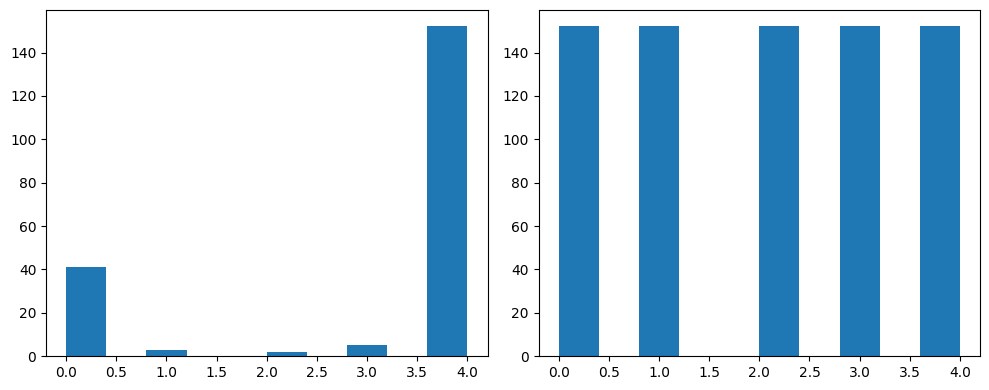

4.0    145
0.0     33
3.0     17
2.0      6
1.0      2
Name: treatment_cycle_toxicity_haematological_platelets, dtype: int64
1
Cycle 7: platelets oversampling completed


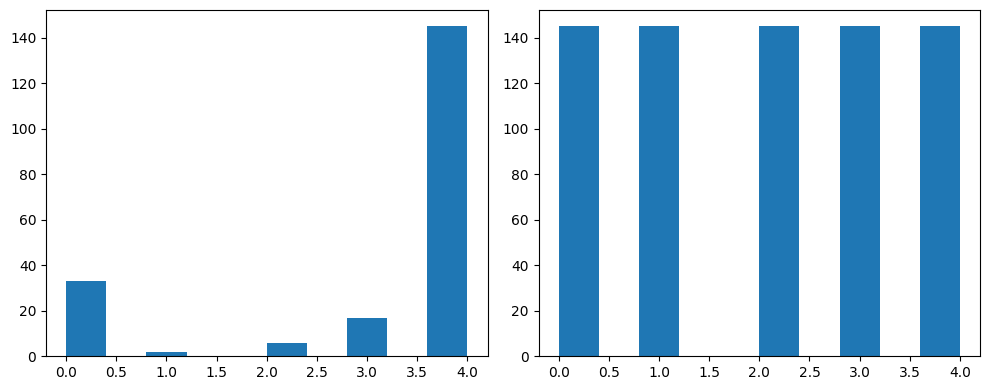

2.0    84
3.0    47
0.0    40
1.0    18
4.0    14
Name: treatment_cycle_toxicity_haematological_hb, dtype: int64
5
Cycle 7: hb oversampling completed


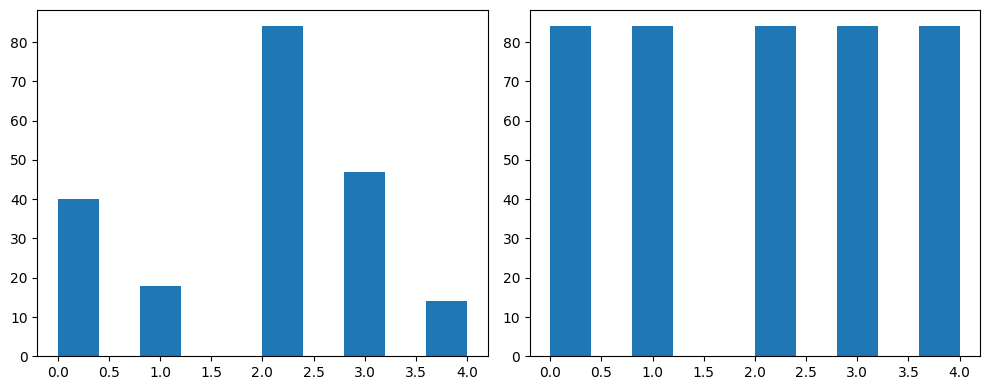

4.0    145
0.0     47
3.0      7
2.0      2
1.0      2
Name: treatment_cycle_toxicity_haematological_granulocytes, dtype: int64
1
Cycle 7: granulocytes oversampling completed


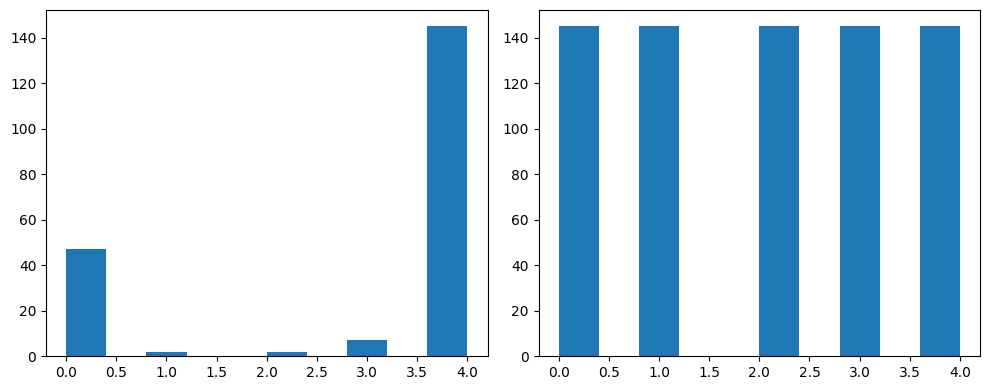

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE

#X_train_all, y_train_all, X_test_all, y_test_all are matrices of dataframes
#Rows represent the cycles of the therapy
#Colums represent the types of toxicities
#For X_train_all and X_test_all each cell is a dataframe with the baseline of the patients
#For y_train_all and y_test_all each cell is a column with the values of the haematological toxicity per patient

#Initialize oversampler
oversample = SMOTE(sampling_strategy="all", k_neighbors=1)

for i in range(len(X_train_all)):
  for j in range(len(X_train_all[i])):

    X_train = X_train_all[i][j] #baseline cycle i toxicity j
    y_train = y_train_all[i][j] #targets cycle i toxicity j

    #Plot histograms of haematological toxicity before oversampling
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].hist(y_train)

    #Replace values that occur only once with the value that has the maximum occurrence
    y_train_vals = y_train.value_counts()
    for val in y_train_vals[y_train_vals <= 1].index:
      y_train = y_train.replace(val, y_train_vals.idxmax())


    #skip if y_train has only one class
    if y_train.nunique() == 1:
      print(f"Cycle {i}: {int_to_tox_map[j]} has just one class, does not need to oversample ")
      #Plot histograms of haematological toxicity after oversampling
      axs[1].hist(y_train)
      # Aggiusta il layout per una migliore visualizzazione
      plt.tight_layout()
      # Mostra il grafico
      plt.show()
      continue

    print(y_train.value_counts())
    value_counts = y_train.value_counts()
    if any(value_counts <= 5):
      if any(value_counts <= 3):
        k_neighbors = 1
      else:
        k_neighbors = 3
    else:
      k_neighbors = 5

    print(k_neighbors)
    oversample = SMOTE(sampling_strategy="all", k_neighbors=k_neighbors)

    #Oversampling
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    print(f"Cycle {i}: {int_to_tox_map[j]} oversampling completed")
    X_train_all[i][j] = X_train
    y_train_all[i][j] = y_train

    #Plot histograms of haematological toxicity after oversampling
    axs[1].hist(y_train)
    # Aggiusta il layout per una migliore visualizzazione
    plt.tight_layout()
    # Mostra il grafico
    plt.show()

print(type(X_train_all[i][j]))
print(type(y_train_all[i][j]))


<h2>Random forest classifier</h2>

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rnd = RandomForestClassifier(#max_depth=8,
                             criterion='gini',
                             #class_weight="balanced",
                             #min_impurity_decrease=0.015,
                             random_state=1)



for i in range(len(X_train_all)):
  for j in range(len(X_train_all[i])):

    X_train = X_train_all[i][j]
    X_test = X_test_all[i][j]
    y_train = y_train_all[i][j]
    y_test = y_test_all[i][j]

    rnd = rnd.fit(X_train, y_train)
    y_pred = rnd.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.10f} :: Cycle {i} - {int_to_tox_map[j]} toxicity")
    if y_test.nunique() != 1:
      print(y_test)
      print(y_pred)
      print("ROC:", metrics.roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr'))



<h2>Cross validation</h2>

In [ ]:
#Random forest Cross validation
from sklearn.model_selection import cross_val_score
for i in range(len(X_train_all)):
  for j in range(len(X_train_all[i])):

    X_train = X_train_all[i][j]
    y_train = y_train_all[i][j]

    accuracies=cross_val_score(estimator=rnd, X=X_train, y=y_train, cv=10)
    print(f"average accuracy: {np.mean(accuracies):.10f} average std: {np.std(accuracies):.10f} of cycle {i} - {int_to_tox_map[j]} toxicity")

average accuracy: 1.0000000000 average std: 0.0000000000 of cycle 0 - wbc toxicity
average accuracy: 1.0000000000 average std: 0.0000000000 of cycle 0 - platelets toxicity
average accuracy: 0.9979166667 average std: 0.0062500000 of cycle 0 - hb toxicity
average accuracy: 0.9958333333 average std: 0.0125000000 of cycle 0 - granulocytes toxicity
average accuracy: 0.9553191489 average std: 0.1340425532 of cycle 1 - wbc toxicity
average accuracy: 0.9773584906 average std: 0.0679245283 of cycle 1 - platelets toxicity
average accuracy: 0.9707317073 average std: 0.0838187331 of cycle 1 - hb toxicity
average accuracy: 0.9500000000 average std: 0.1500000000 of cycle 1 - granulocytes toxicity
average accuracy: 0.9673469388 average std: 0.0979591837 of cycle 2 - wbc toxicity
average accuracy: 0.9877777778 average std: 0.0366666667 of cycle 2 - platelets toxicity
average accuracy: 0.9573770492 average std: 0.0927932570 of cycle 2 - hb toxicity
average accuracy: 0.9711340206 average std: 0.08659793

<h2>Grid search Random forest</h2>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid search Random forest

test_results = []
tree = RandomForestClassifier(random_state=1)

for i in range(len(X_train_all)):

  test_results.append([])

  for j in range(len(X_train_all[i])):
    if type(X_train_all[i][j]) == type([-1]):
      test_results.append([-1])
      print(f"Can not predict Cycle {i} - {int_to_tox_map[j]} toxicity")
      continue

    X_train = X_train_all[i][j]
    y_train = y_train_all[i][j]

    #GridSearch
    grid = {"max_depth":np.arange(1,10)}
    tree_cv = GridSearchCV(
        tree,
        grid,
        cv=10,
        #scoring='roc_auc',
        return_train_score=True
    )

    tree_cv.fit(X_train,y_train)
    test_results[i].append(tree_cv.cv_results_)

    print(f"tuned hyperparameter K: {tree_cv.best_params_} :: Cycle {i} - {int_to_tox_map[j]} toxicity")
    print("tuned parameters best scoring (best score):",tree_cv.best_score_)

tuned hyperparameter K: {'max_depth': 1} :: Cycle 0 - wbc toxicity
tuned parametreye best scoring (best score): 1.0
tuned hyperparameter K: {'max_depth': 1} :: Cycle 0 - platelets toxicity
tuned parametreye best scoring (best score): 1.0
tuned hyperparameter K: {'max_depth': 1} :: Cycle 0 - hb toxicity
tuned parametreye best scoring (best score): 0.9979166666666666
tuned hyperparameter K: {'max_depth': 4} :: Cycle 0 - granulocytes toxicity
tuned parametreye best scoring (best score): 0.9958333333333333
tuned hyperparameter K: {'max_depth': 5} :: Cycle 1 - wbc toxicity
tuned parametreye best scoring (best score): 0.9585106382978724
tuned hyperparameter K: {'max_depth': 9} :: Cycle 1 - platelets toxicity
tuned parametreye best scoring (best score): 0.9783018867924529
tuned hyperparameter K: {'max_depth': 5} :: Cycle 1 - hb toxicity
tuned parametreye best scoring (best score): 0.975609756097561
tuned hyperparameter K: {'max_depth': 5} :: Cycle 1 - granulocytes toxicity
tuned parametreye b

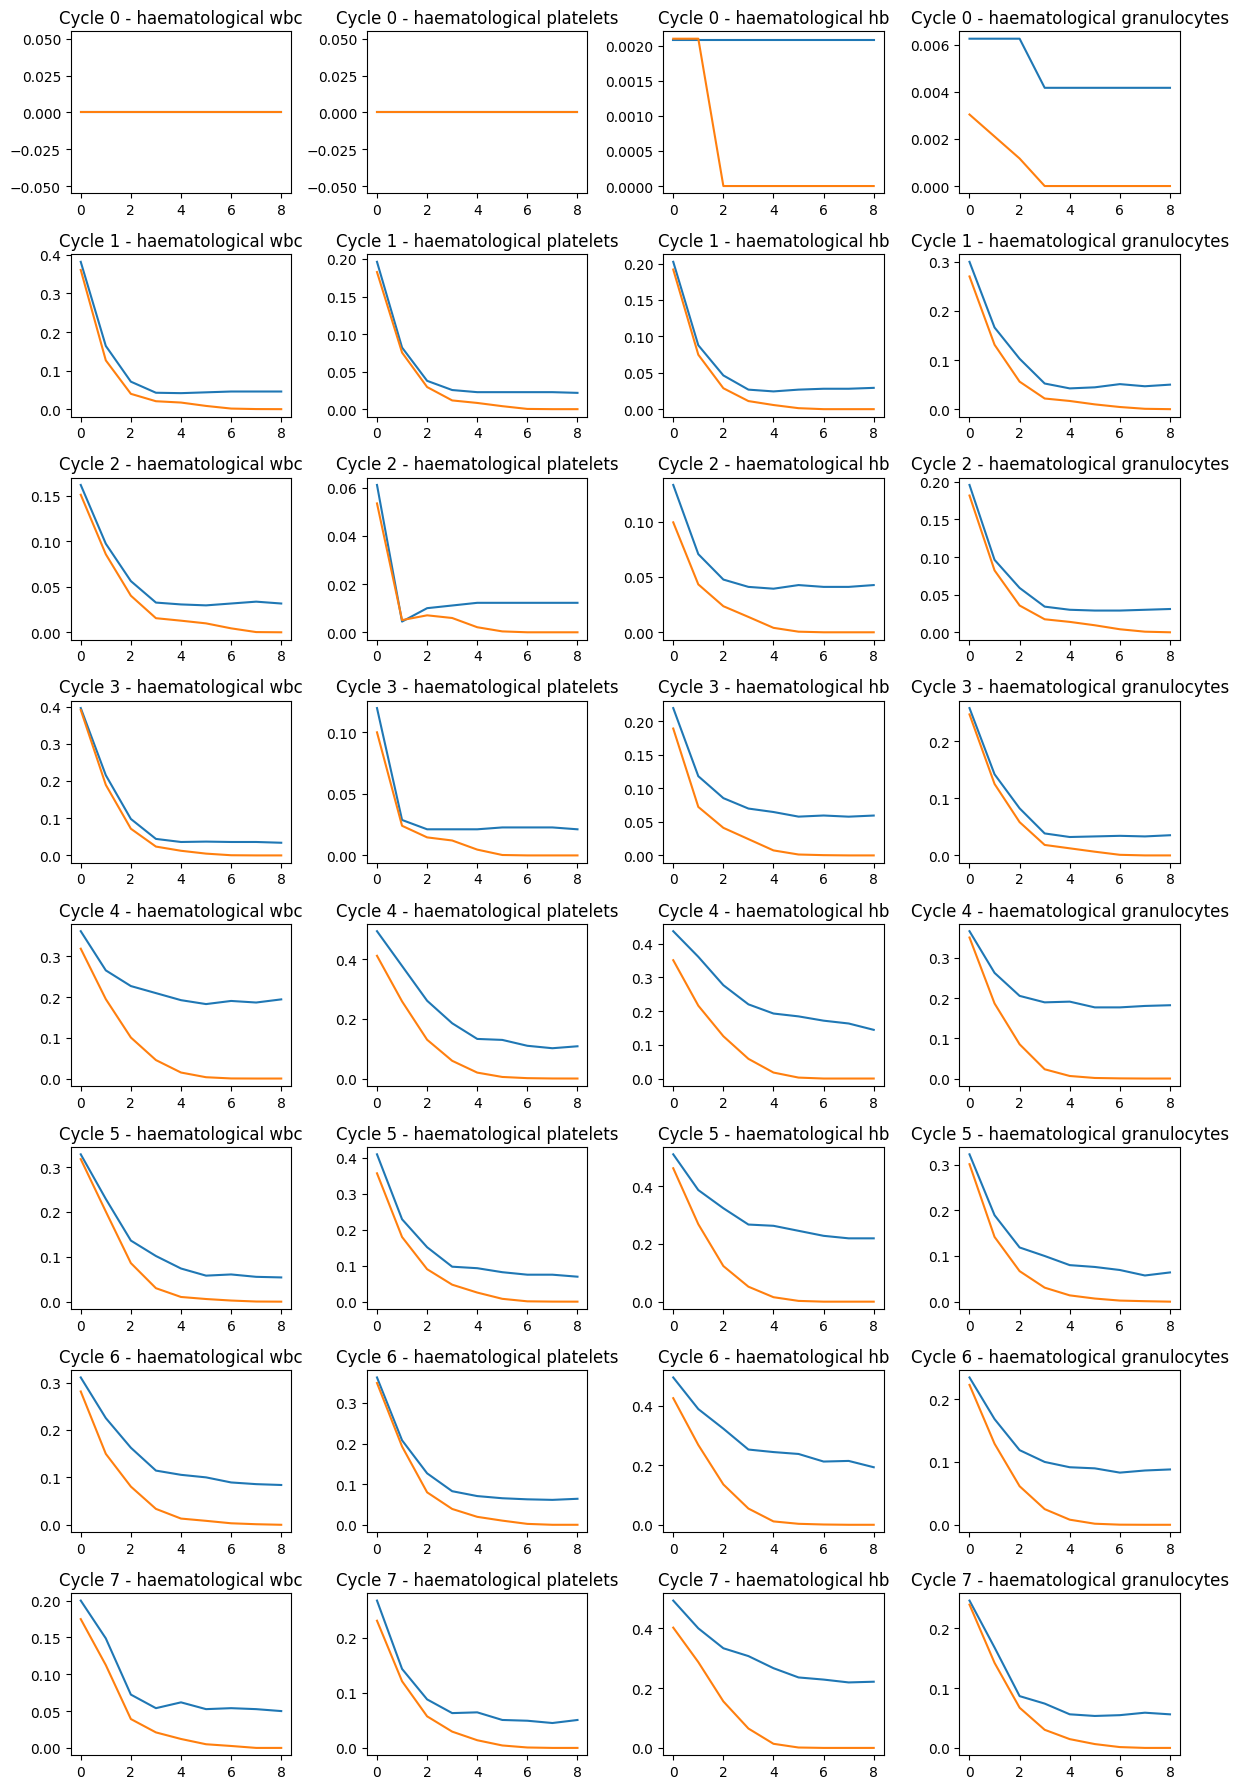

In [ ]:
fig, axs = plt.subplots(8, 4, figsize=(12, 18))

for cycle in range(len(test_results)):
  for toxicity in range(len(test_results[i])):

    test_scores = 1.0 - test_results[cycle][toxicity]['mean_test_score']
    train_scores = 1.0 - test_results[cycle][toxicity]['mean_train_score']

    i=cycle
    j=toxicity

    #Plot on each subplot
    axs[i,j].plot(test_scores, label='test_error')
    axs[i,j].plot(train_scores, label='train_error')
    axs[i,j].set_title(f'Cycle {cycle} - haematological {int_to_tox_map[toxicity]}')

#fig.suptitle("Random forest classifier")
plt.tight_layout()
plt.show()